# Data Preprocessing For Loan Approval Prediction System
The **Loan Approval Prediction System** is a machine learning-based solution designed to automate and enhance the loan application evaluation process. By analyzing historical loan data, the system predicts whether a loan application is likely to be approved based on various applicant attributes. This predictive model not only improves decision-making accuracy but also reduces manual workload, enabling financial institutions to streamline operations and provide faster responses to applicants.

# **Import Libraries**

In [1]:
# import libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy.stats import chi2_contingency, spearmanr, f_oneway
import scipy.stats as stats
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# **Load Dataset**

In [2]:
# reading file path
file = Path(r"../data/loan.csv")

# reading csv file
df = pd.read_csv(file)

In [3]:
# testing dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# **Sanity Check**

In [4]:
# quick overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# dataset description
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# check column names
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
# drop redundant columns
df.drop(columns='Loan_ID', axis=1, inplace=True)

df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## **Check for Duplicates**

In [8]:
# check duplicates values
df.duplicated().sum()

np.int64(0)

## **Check for null values**

In [9]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# Drop rows with minimal null values
df.dropna(subset=["Married"], inplace=True)

In [11]:
df.isnull().sum()

Gender               13
Married               0
Dependents           12
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## **Standardize Column Names**

In [12]:
# Standardize Column Names
df.columns = df.columns.str.replace('_', '')

df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'SelfEmployed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'LoanAmountTerm',
       'CreditHistory', 'PropertyArea', 'LoanStatus'],
      dtype='object')

## **Standardize Values**

### Checking unique values

In [13]:
df['LoanStatus'].unique()

array(['Y', 'N'], dtype=object)

In [14]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [15]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [16]:
# Replacing '3+' with '3' in the 'Dependents' column
df['Dependents'] = df['Dependents'].str.replace('3+', '3')

df['Dependents'].unique()

array(['0', '1', '2', '3', nan], dtype=object)

In [17]:
df['LoanAmountTerm'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

### **Data type conversion**

In [18]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
SelfEmployed          object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
LoanAmountTerm       float64
CreditHistory        float64
PropertyArea          object
LoanStatus            object
dtype: object

In [19]:
# columns to convert
cols_to_convert = ['Dependents', 'CreditHistory']

# convert data types to integer
df[cols_to_convert] = df[cols_to_convert].astype('Int64')

In [20]:
df.dtypes

Gender                object
Married               object
Dependents             Int64
Education             object
SelfEmployed          object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
LoanAmountTerm       float64
CreditHistory          Int64
PropertyArea          object
LoanStatus            object
dtype: object

# **Exploratory Data Analysis (EDA)**

In [21]:
# figure size
plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

## **Univariate Analysis**

### **countplot for unique value distribution**

In [22]:
len(df.select_dtypes(include='object').columns)

6

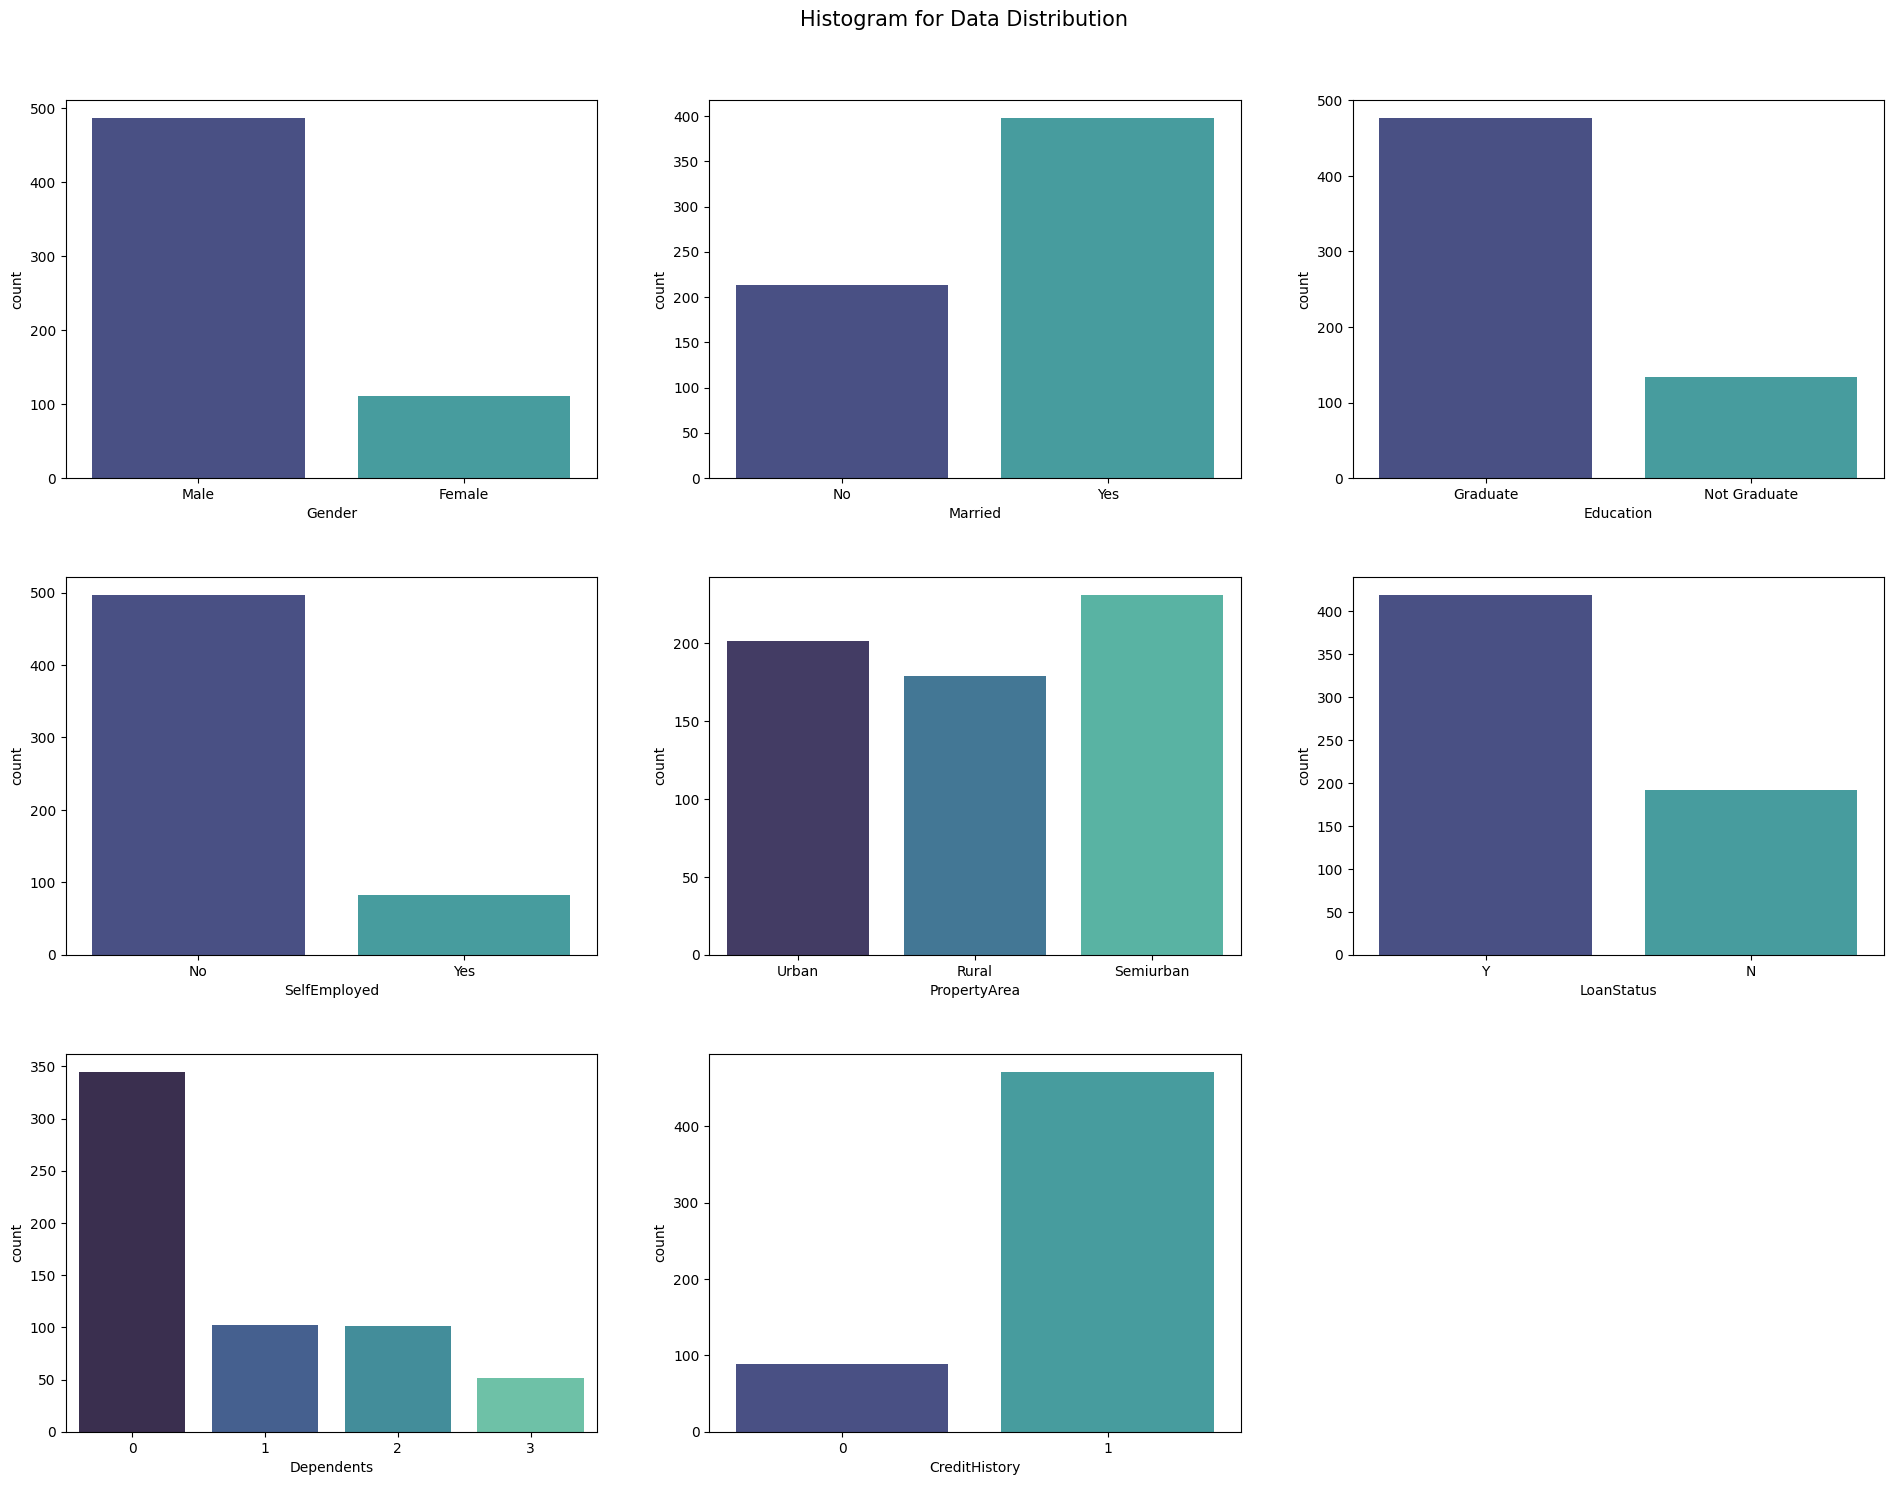

In [23]:
# columns for unique value distribution
categorical_cols = df.select_dtypes(include="object").columns.to_list() + ['Dependents', 'CreditHistory']

# set the number of rows and columns for the grid
rows, cols = 3, 3

# create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
fig.tight_layout(pad=5.0)
fig.suptitle('Histogram for Data Distribution', fontsize=15, y=1.01)

# loop through each column and plot on a different subplot
for i, col in enumerate(categorical_cols):
    row_pos = i // cols
    col_pos = i % cols
    sns.countplot(data=df, x=col, ax=axes[row_pos, col_pos], palette="mako")
    plt.title(f"{col} Distribution")


# remove any empty subplots
for j in range(i+1, rows*cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.show()

#### **Analysis of Countplots**

The provided countplots offer insights into the distribution of categorical variables in the dataset. Below is a detailed analysis of each countplot:

##### **1. Gender**
**Key Observation:**
- Male applicants significantly outnumber Female applicants
- Approximately 82% of applicants are Male, while only 18% are Female

**Key Takeaways:**
- Severe gender imbalance in the dataset
- Female applicants are underrepresented in loan applications
- Missing Gender data needs to be addressed

**Decision / Action:**
- Handle missing Gender values using **`KNN imputation`** or predictive imputation
- Consider using techniques like SMOTE or class weighting to address gender imbalance during modeling
- Validate if gender bias exists in loan approval decisions

##### **2. Married**
**Key Observation:**
- Majority of applicants are Married (approximately 65%)
- About 35% of applicants are Not Married

**Key Takeaways:**
- Married individuals are more likely to apply for loans
- Marriage status could be an important factor in loan approval
- Relatively balanced distribution compared to other categorical variables

**Decision / Action:**
- Handle missing values using **`KNN imputation`**
- Include Married status as a feature in the model
- Analyze approval rates by marital status to understand its impact

##### **3. Education**
**Key Observation:**
- Overwhelming majority are Graduates (approximately 80%)
- Only about 20% are Not Graduate

**Key Takeaways:**
- Strong educational bias toward graduates in loan applications
- Graduates may have better income prospects and loan eligibility
- Educational qualification is likely to be a significant factor in loan approval

**Decision / Action:**
- Handle missing values using **`KNN imputation`**
- Keep as binary categorical variable (Graduate vs Not Graduate)
- Analyze approval rates by education level to understand its impact

##### **4. SelfEmployed**
**Key Observation:**
- Vast majority are Not SelfEmployed (approximately 87%)
- Only about 13% are SelfEmployed

**Key Takeaways:**
- Salaried individuals dominate loan applications
- SelfEmployed applicants are underrepresented
- Missing values in this feature are substantial and need careful handling

**Decision / Action:**
- Handle missing values using **`KNN imputation`**
- Consider creating a separate category for missing values if they represent a meaningful group
- Analyze if self-employment affects loan approval rates due to income stability concerns

##### **5. CreditHistory**
**Key Observation:**
- Most applicants have good credit history (CreditHistory = 1.0)
- Approximately 75% have CreditHistory = 1.0, while 25% have 0.0

**Key Takeaways:**
- Majority of applicants have good credit standing
- Credit history is likely to be one of the most important factors in loan approval
- The distribution suggests credit history is a strong predictor

**Decision / Action:**
- Handle missing values using **`KNN imputation`**
- Keep as binary feature (1.0 = Good credit, 0.0 = Bad credit)
- This will likely be a very important feature in the predictive model

##### **6. PropertyArea**
**Key Observation:**
- Semiurban areas have the highest representation
- Urban and Rural areas have relatively balanced representation
- Distribution is fairly even across all three property types

**Key Takeaways:**
- Applicants from all property areas are well-represented
- Semiurban applicants are slightly more common
- Property area may reflect economic factors affecting loan approval

**Decision / Action:**
- No missing values to handle
- Use one-hot encoding for this categorical variable
- Analyze approval rates by property area to understand regional differences

### **histplot for data distribution**

In [24]:
len(df.select_dtypes(include='number').columns)

6

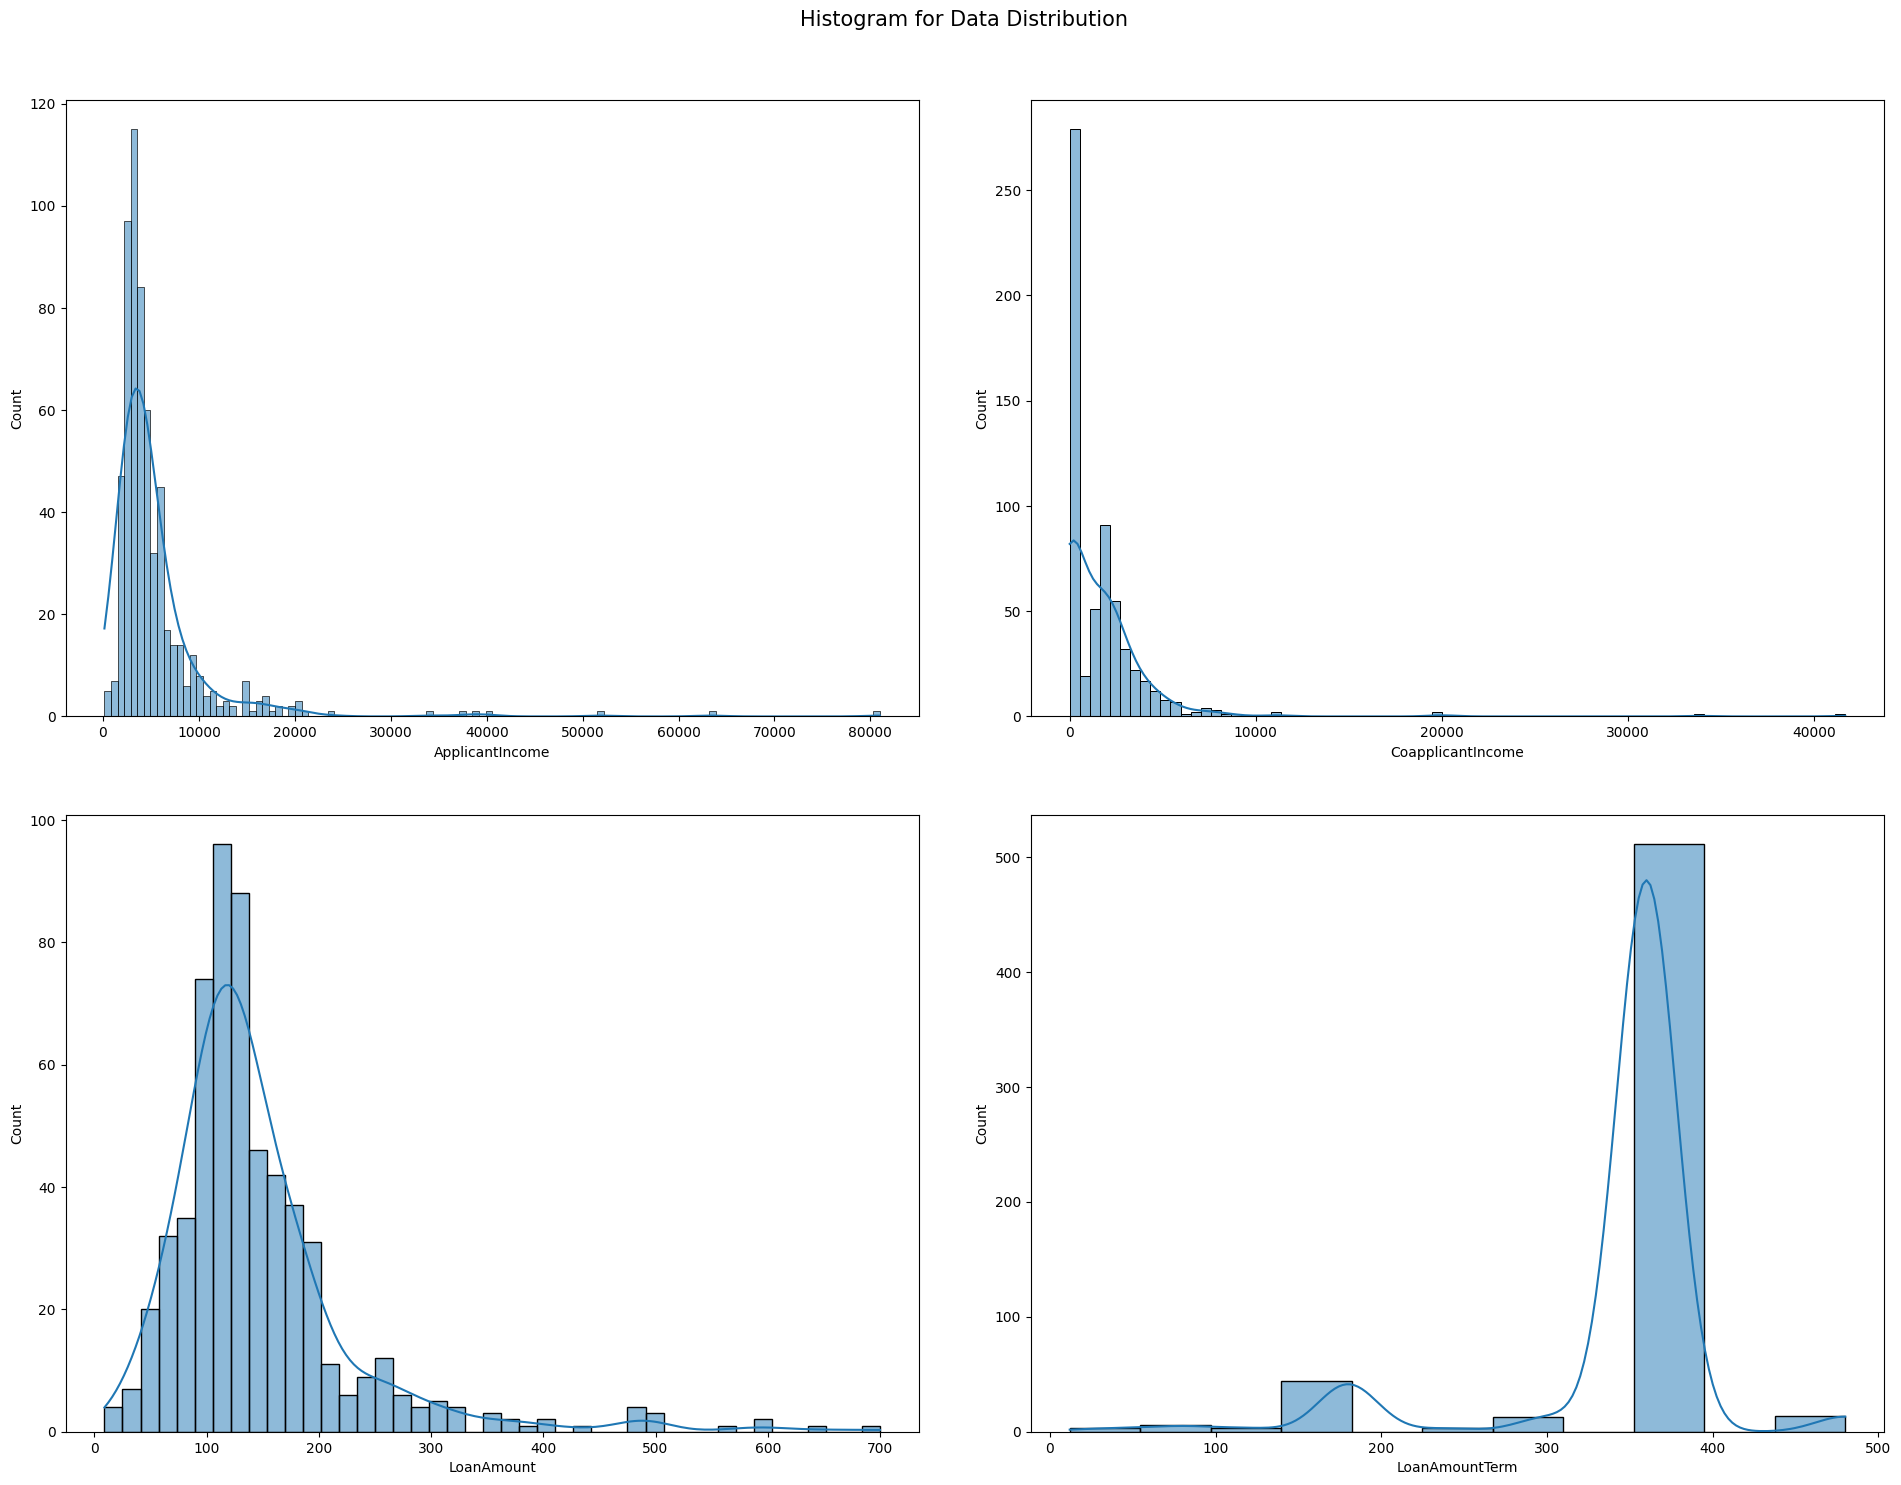

In [25]:
# exclude the binary columns
numerical_cols = [col for col in df.select_dtypes(include="number").columns if col not in ['Dependents', 'CreditHistory']]

# set grid size dynamically
# ceil division for rows
rows = (len(numerical_cols) + 1) // 2
cols = 2

# create subplots
# flatten to 1D for easier indexing
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten()

fig.tight_layout(pad=5.0)
fig.suptitle('Histogram for Data Distribution', fontsize=15, y=1.01)

# plot histograms
for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, ax=axes[i], palette="mako", kde=True)

# remove unused subplots
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.show()


#### **Analysis of Histogram**

##### **1. ApplicantIncome**
**Key Observation:**  
- The distribution is **right-skewed**, with most applicants having lower incomes.
- There is a peak around the lower income range (e.g., below $10,000).
- A long tail extends to higher income levels, indicating a few high-income outliers.
- Missing values: No missing values detected.

**Takeaways**:
- Income levels vary widely, but most applicants have relatively low incomes.
- The skewness suggests that a transformation (e.g., logarithmic) might be necessary to normalize the distribution.
- High-income outliers could disproportionately influence model performance if not handled properly.

**Decision / Action**:
- Apply a **logarithmic transformation** or **box-cox transformation** to reduce skewness.
- Handle outliers by either capping extreme values or using robust scaling techniques.
- Investigate whether `ApplicantIncome` correlates strongly with other features like `LoanAmount` or `LoanStatus`.


##### **2. CoapplicantIncome**
**Key Observation:**
- The distribution is also **right-skewed**, similar to `ApplicantIncome`.
- Most co-applicants have very low or zero income, indicating many applications do not involve a co-applicant.
- A smaller group has moderate to high income, but these are rare compared to those with no income.
- Missing values: No missing values detected.

**Takeaways**:
- Many applicants do not have a co-applicant or the co-applicant has no income.
- The presence of a co-applicant with income may indicate a stronger financial profile.
- Skewness and outliers need addressing to avoid bias in modeling.

**Decision / Action**:
- Apply a **logarithmic transformation** after adding a small constant to handle zeros (e.g., `np.log(CoapplicantIncome + 1)`).
- Investigate interactions between `ApplicantIncome` and `CoapplicantIncome` to understand their combined effect on loan approval.


##### **3. LoanAmount**
**Key Observation:**
- The distribution is **right-skewed**, with most loans clustered at lower amounts.
- There is a peak around the lower loan amount range (e.g., below $200,000).
- A long tail extends to higher loan amounts, indicating some large loan requests.
- Missing values: Some missing values detected.

**Takeaways**:
- Loan amounts vary significantly, but most applicants request moderate loan amounts.
- Higher loan amounts are less frequent but still present.
- Missing values in `LoanAmount` need imputation before further analysis or modeling.

**Decision / Action**:
- Apply a **logarithmic transformation** to reduce skewness.
- Impute missing values using methods like median imputation or KNN imputation based on related features.
- Investigate whether loan amount correlates with income levels, property area, or credit history.


##### **4. LoanAmountTerm**
**Key Observation:**
- The distribution shows a **bimodal pattern** with peaks at specific standard terms (e.g., 360 months and 180 months).
- Most loans have standardized terms, with fewer loans having shorter or longer terms.
- Missing values: No missing values detected.

**Takeaways**:
- Loan terms are highly structured, with most applicants opting for common durations like 30 years (360 months).
- This feature might be better treated as categorical or ordinal rather than numerical due to its discrete nature.
- Standardized terms suggest lending policies or preferences.

**Decision / Action**:
- Treat `LoanAmountTerm` as a **categorical variable** or create bins (e.g., Short, Medium, Long term).
- If kept numerical, ensure proper scaling during preprocessing.
- Investigate whether loan term length affects repayment behavior or approval rates.

---

##### **Summary of Missing Values**
- **Missing Values Status**:
  - `ApplicantIncome`: No missing values.
  - `CoapplicantIncome`: No missing values.
  - `LoanAmount`: Some missing values detected.
  - `LoanAmountTerm`: Some missing values detected.

**Action Plan for Missing Values**:
- For `LoanAmount` or **KNN imputation** to fill missing values.
- For `LoanAmountTerm`, use **KNN imputation**


##### **Final Recommendations**
1. **Transformations**:
   - Apply logarithmic transformations to `ApplicantIncome`, `CoapplicantIncome`, and `LoanAmount` to reduce skewness.
   - Scale `LoanAmountTerm` if kept numerical or treat it as categorical.

2. **Handling Outliers**:
   - Cap extreme values or use robust scaling for `ApplicantIncome` and `LoanAmount`.

3. **Imputation**:
   - Use median or KNN imputation for `LoanAmount`.

4. **Modeling Considerations**:
   - Address class imbalance in `CreditHistory` and `LoanStatus`.
   - Validate models using stratified sampling and appropriate metrics.

### **Boxplot for Detecting Outliers**

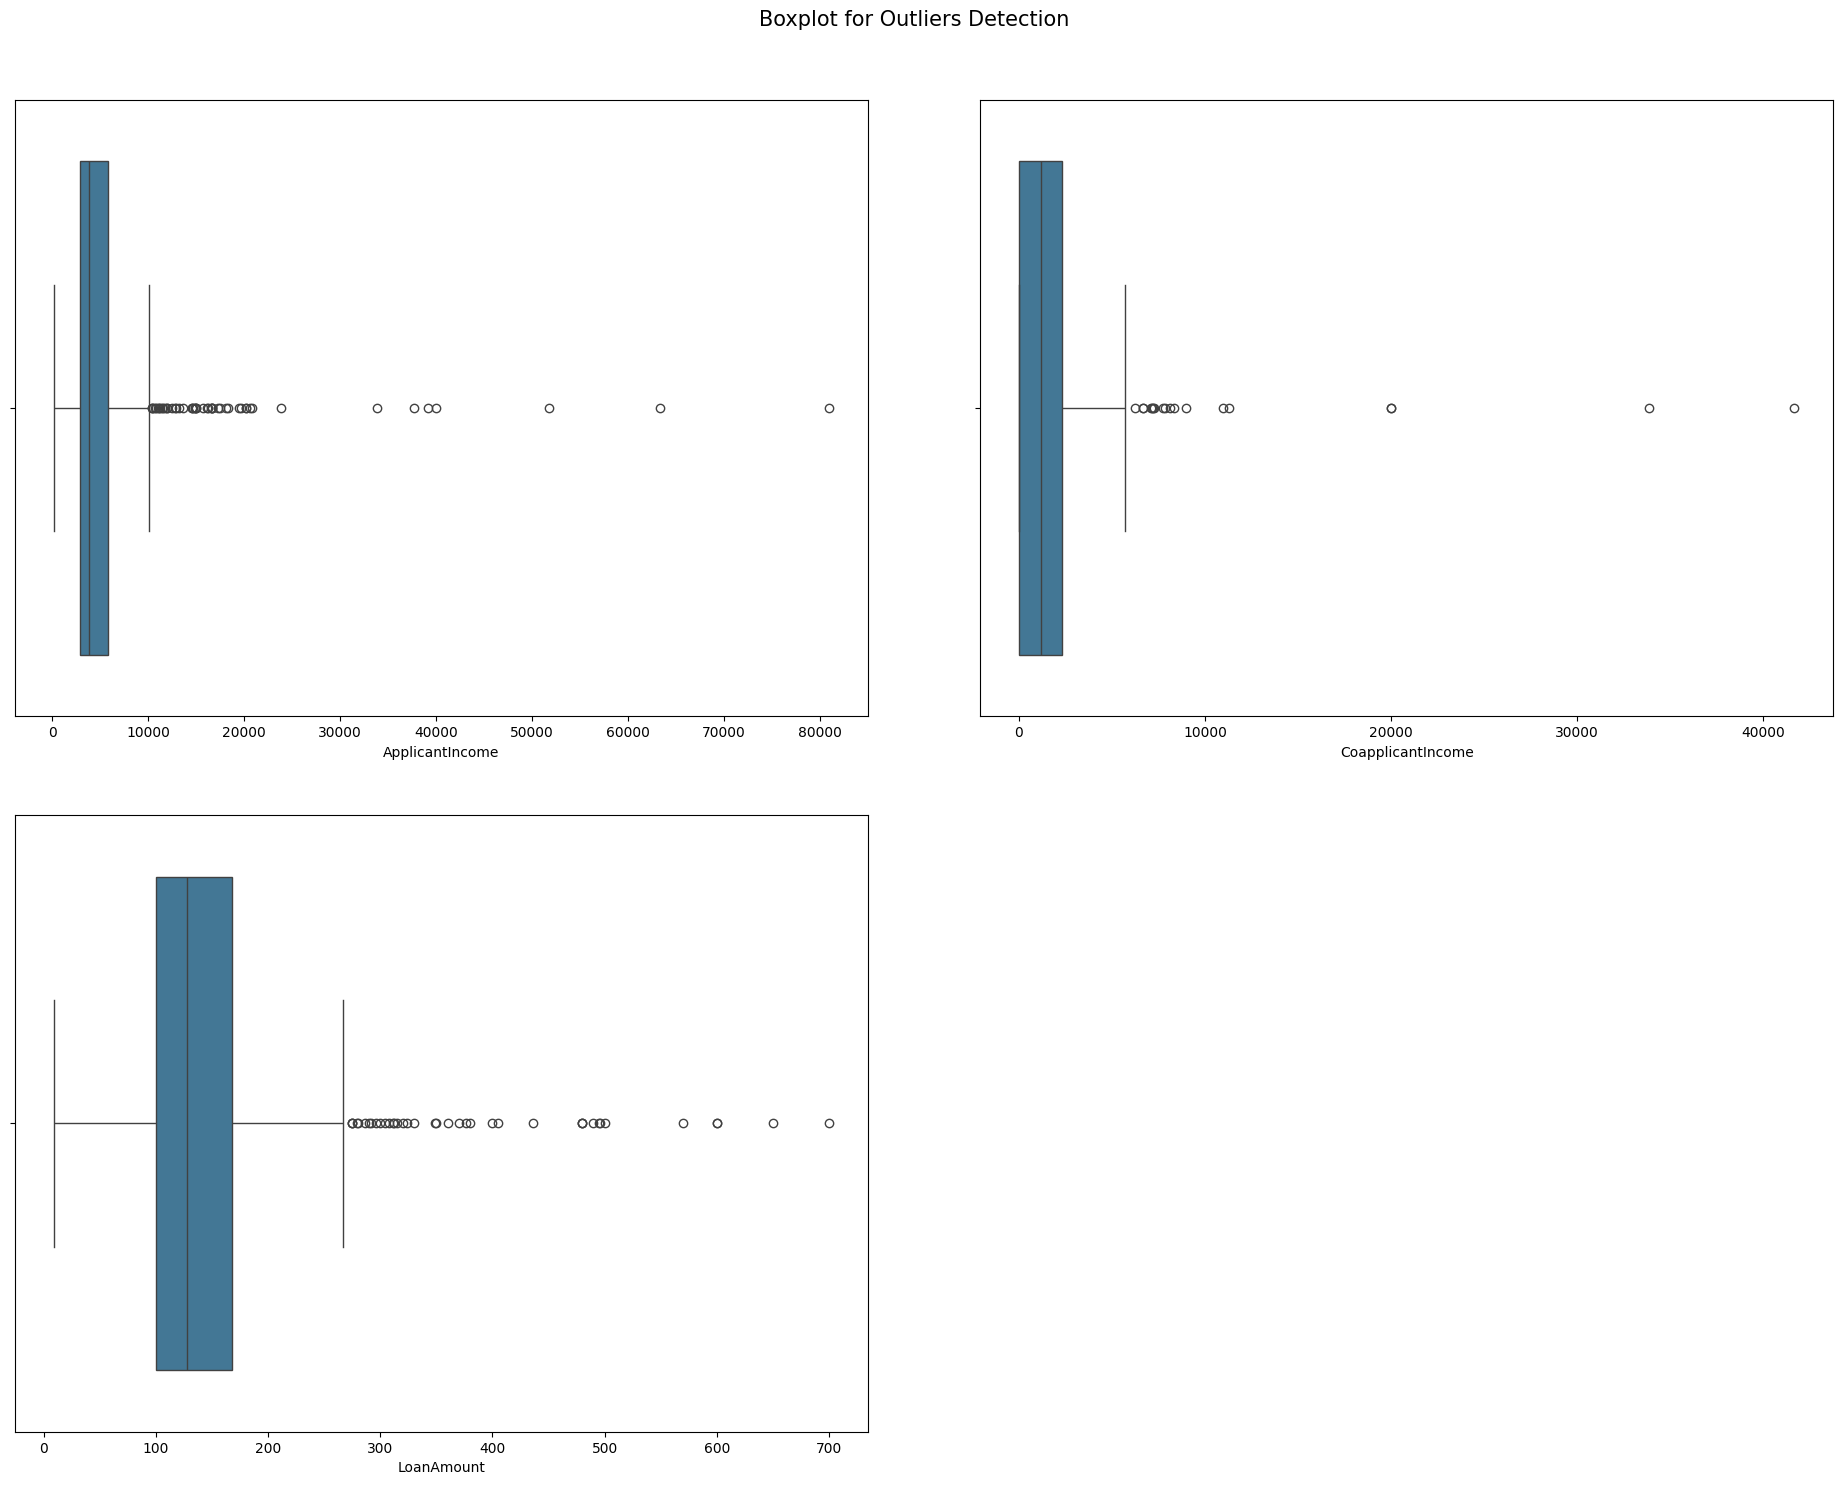

In [26]:
# Column to check
numeric_columns = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]

# set the number of rows and columns for the grid
rows, cols = 2, 2

# create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
fig.tight_layout(pad=5.0)
fig.suptitle('Boxplot for Outliers Detection', fontsize=15, y=1.01)

# loop through each column and plot on a different subplot
for i, col in enumerate(numeric_columns):
    row_pos = i // cols
    col_pos = i % cols
    sns.boxplot(data=df, x=col, ax=axes[row_pos, col_pos], palette="mako")


# remove any empty subplots
for j in range(i+1, rows*cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.show()

#### **Analysis of Boxplot**

##### **1. ApplicantIncome**
**Key Observation:**
- The boxplot shows a highly right-skewed distribution with a long tail extending to the right.
- There are several data points marked as outliers (circles) beyond the upper whisker, indicating high-income applicants.
- The median is close to the lower quartile, suggesting most applicants have lower incomes.

**Key Takeaways:**
- A small number of high-income applicants significantly skew the income distribution.
- These high-income outliers could be influential points in model training and might need special handling.
- The majority of applicants have incomes below the 75th percentile.

**Decision / Action:**
- Apply a logarithmic transformation to normalize the distribution.
- Consider capping extreme values at the 95th or 99th percentile to reduce the impact of outliers.
- Investigate these high-income outliers to determine if they are valid data points or errors.


##### **2. CoapplicantIncome**
**Key Observation:**
- The distribution is also right-skewed, but less so than `ApplicantIncome`.
- Most co-applicants incomes are clustered near zero, indicating many applicants do not have a co-applicant or the co-applicant has no income.
- A few data points are marked as outliers, representing co-applicants with very high incomes.

**Key Takeaways:**
- Many applicants applications without a co-applicant or with a co-applicant who has no income.
- The presence of a co-applicant with significant income is relatively rare.
- The distribution suggests that co-applicant income is often negligible compared to applicant income.

**Decision / Action:**
- Apply a logarithmic transformation after adding a small constant (e.g., `np.log(CoapplicantIncome + 1)`) to handle zeros.
- Handle outliers by capping or using robust scaling techniques.


##### **3. LoanAmount**
**Key Observation:**
- The boxplot shows a right-skewed distribution with a long tail to the right.
- There are several data points marked as outliers beyond the upper whisker, indicating large loan amounts.
- The median is closer to the lower quartile, suggesting most loans amounts are moderate.

**Key Takeaways:**
- A small number of applicants request very large loans amounts.
- These large loan amounts could be outliers that affect model performance.
- The majority of loan requests amounts are within a moderate range.

**Decision / Action:**
- Apply a logarithmic transformation to reduce skewness.
- Consider capping extreme values at the 95th or 99th percentile to mitigate the impact of outliers.
- Investigate these large loan amount outliers to determine if they are valid or potential data errors.

---

##### **Summary of Outlier Detection**

| Feature | Number of Outliers | Nature of Outliers | Recommended Action |
|--------|------------------|--------------------|-------------------|
| **ApplicantIncome** | Several | High-income applicants | Log transform, cap outliers |
| **CoapplicantIncome** | Few | High-income co-applicants | Log transform, create binary feature |
| **LoanAmount** | Several | Large loan amounts | Log transform, cap outliers |

## **Bivariate Analysis**

### **Scatterplot for numerical relationship**

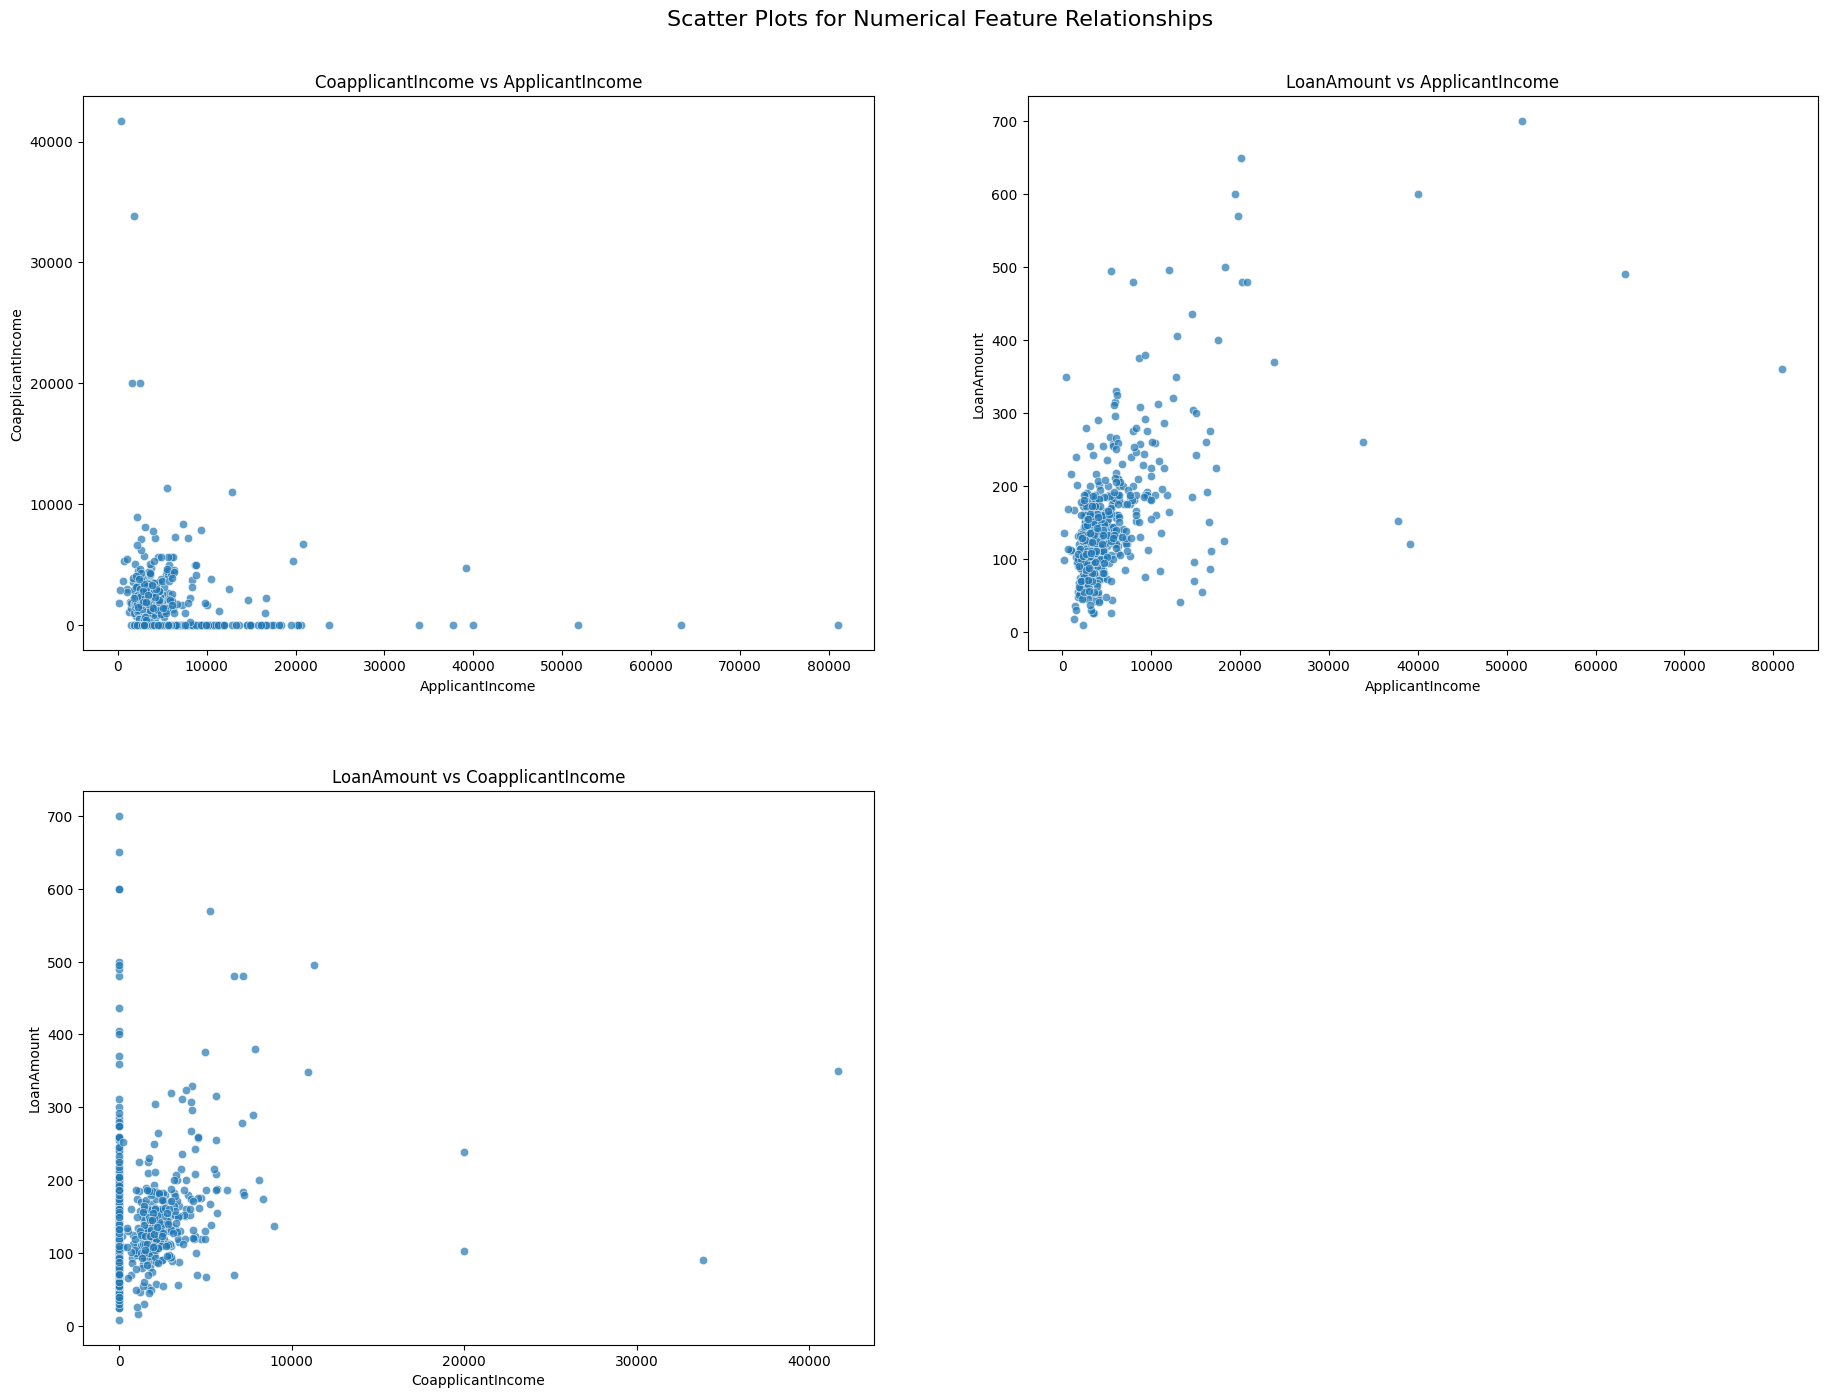

In [27]:
# Define the pairs of numerical columns for scatter plots ---
scatter_pairs = [
    ('ApplicantIncome', 'CoapplicantIncome'),
    ('ApplicantIncome', 'LoanAmount'),
    ('CoapplicantIncome', 'LoanAmount')
    ]

# Set up the subplot grid
# Calculate rows needed for 2 columns
plots = len(scatter_pairs)
cols = 2
rows = (plots + cols - 1) // cols

# Create subplots
# Flatten axes array for easier indexing, even if there's only one row
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten() if plots > 1 else [axes]

plt.tight_layout(pad=8.0)
fig.suptitle('Scatter Plots for Numerical Feature Relationships', fontsize=16)

# plot scatter plots
for i, (col_x, col_y) in enumerate(scatter_pairs):
    sns.scatterplot(data=df, x=col_x, y=col_y, ax=axes[i], alpha=0.7)
    axes[i].set_title(f'{col_y} vs {col_x}')

# remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

#### **Analysis of Scatterplot**

##### **1. CoapplicantIncome vs ApplicantIncome**
**Key Observation:**
- The scatter plot shows a wide spread of data points, with most applicants having low to moderate co-applicant income.
- There are several high-income co-applicants points (above 20,000) that stand out.
- A significant number of points have zero co-applicant income, indicating many applicants do not have a co-applicant or the co-applicant has no income.

**Key Takeaways:**
- Co-applicant income is generally lower than applicant income.
- The presence of high-income co-applicants points suggests some applicants-co-applicant pairs have substantial combined incomes.
- Many applicants applications without a co-applicant, which could be an important factor in loan approval.

**Decision / Action:**
- Create a binary feature (`Has_CoapplicantIncome`) to capture whether a co-applicant has income.
- Consider using total income (`ApplicantIncome + CoapplicantIncome`) as a more meaningful feature for modeling.
- Investigate if high co-applicant income correlates with higher loan amounts or better approval rates.


##### **2. LoanAmount vs ApplicantIncome**
**Key Observation:**
- The scatter plot shows a positive correlation between applicant income and loan amount.
- Most applicants with higher incomes tend to request larger loans amounts.
- There are several outliers where applicants with moderate incomes request very large loan amounts, and vice versa.

**Key Takeaways:**
- Higher applicant income is associated with larger loan requests amounts.
- The relationship is not perfectly linear, indicating other factors also influence loan amount.
- Outliers suggest some applicants may be requesting loans amounts disproportionateately high relative to their income.

**Decision / Action:**
- Calculate the `Income_to_Loan_Ratio` (LoanAmount / ApplicantIncome) as a new feature.
- Use this ratio to identify potentially risky loan requests where the amount requested is disproportionately high compared to income.
- Investigate if this ratio correlates with loan approval status.


##### **3. LoanAmount vs CoapplicantIncome**
**Key Observation:**
- Similar to the previous plot, there is a positive correlation between co-applicant income and loan amount.
- Most applicant with higher co-applicant incomes tend to request larger loan amounts.
- There are several outliers where applicant with low co-applicant incomes request large loan amounts.

**Key Takeaways:**
- Co-applicant income contributes to the ability to request larger loan amounts.
- The relationship is less strong than with applicant income, suggesting applicant income is the primary driver.
- Outliers indicate some applicant may rely heavily on co-applicant income for large loan requests.

**Decision / Action:**
- Use the same `Income_to_Loan_Ratio` calculation, but consider both applicant and co-applicant incomes.
- Create a `Total_Income_to_Loan_Ratio` feature to capture the combined financial capacity.
- Investigate if the co-applicant's contribution is more significant for certain types of loans or applicant profiles.

---

##### **Overall Observations**

- **Combined Income Matters:** Both applicant and co-applicant incomes contribute to the ability to request larger loan amounts.
- **Outliers Exist:** There are cases where the loan amount requested seems disproportionateately high or low relative to the applicant's income, which could be worth investigating further.
- **Feature Engineering Opportunity:** Creating features like `Total_Income`, `Income_to_Loan_Ratio`, and `Has_CoapplicantIncome` can provide valuable insights for the model.

### **Stacked bar plots for categorical features vs target features**

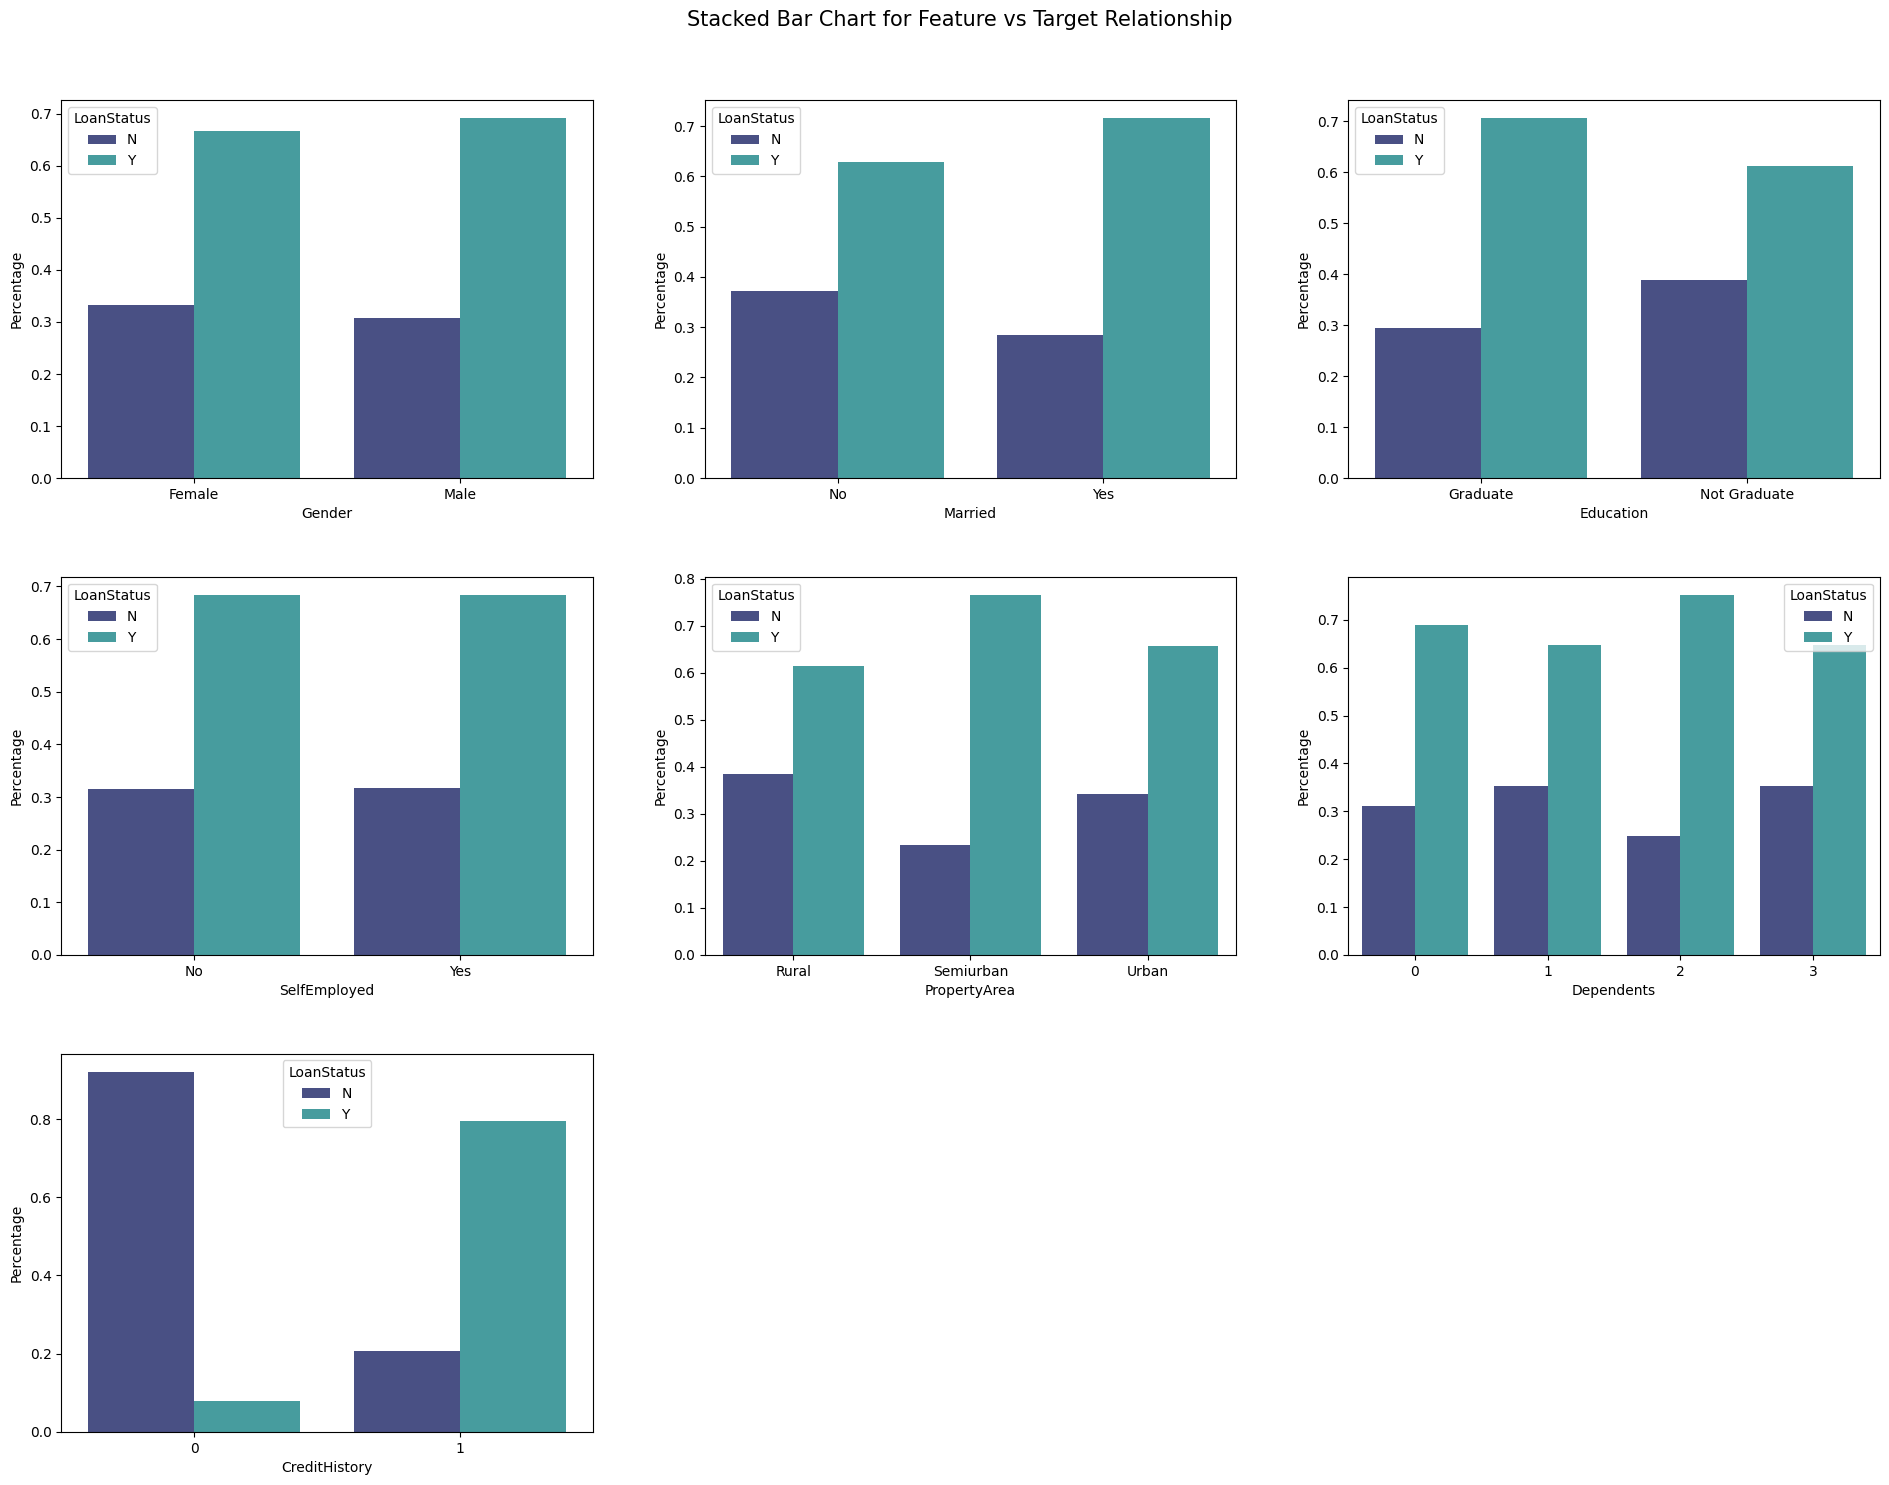

In [28]:
# filter categorical columns
categorical_cols = [col for col in categorical_cols if col != "LoanStatus"]

# set grid size dynamically
rows = int(len(categorical_cols) / 3) + 1
cols = 3

# create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 15)) 
axes = axes.flatten()

fig.tight_layout(pad=5.0)
fig.suptitle('Stacked Bar Chart for Feature vs Target Relationship', fontsize=15, y=1.01)

for i, col in enumerate(categorical_cols):
    
    # Create the data for the bar plot
    temp_df = (df.groupby([col, "LoanStatus"]).size() / df.groupby(col).size()).reset_index(name='Percentage')

    # Plot the bar plot
    sns.barplot(data=temp_df, x=col, y='Percentage', hue='LoanStatus', ax=axes[i], palette="mako")

# remove any empty subplots
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.show()

#### **Analysis of Bar Charts**

##### **1. Gender**
**Key Observation:**
- The percentage of loan approvals (Y) is higher for both males and females.
- Female applicantsants have a slightly higher approval rate compared to male applicantants.

**Key Takeaways:**
- Gender does not appear to be a strong predictor of loan approval, as the approval rates are similar for both genders.
- There might be a slight preference for female applicantants, but this needs further investigation.

**Decision / Action:**
- Consider including gender in the model, but it may not be a highly influential feature.
- Investigate if there are any other factors that could explain the slight difference in approval rates.


##### **2. Married**
**Key Observation:**
- The percentage of loan approval (Y) is higher for both married and not married applicantants.
- Married applicantants have a higher approval rate compared to unmarried applicantants.

**Key Takeaway:**
- Marriage status appears to have a moderate impact on loan approval.
- Being married might be associated with a higher chance of approval, possibly due to fewer financial obligations.

**Decision / Action:**
- Include marriage status in the model, as it shows a meaningful relationship with the target variable.
- Investigate if being married correlates with other factors like income or dependents count.


##### **3. Education**
**Key Observation:**
- The percentage of loan approval (y) is higher for both graduate and not graduate applicantants.
- Graduate applicantants have a higher approval rate compared to not graduate applicantants.

**Key Takeaway:**
- Educational qualification is a significant factor in loan approval.
- Graduates are more likely to get their loans approved, which makes sense given their potentially better job prospects and income stability.

**Decision / Action:**
- Include education level in the model, as it is a strong predictor of loan approval.
- Consider creating a binary feature (Graduate vs Not Graduate) for easier modeling.


##### **4. SelfEmployed**
**Key Observation:**
- The percentage of loan approval (y) is higher for both self-employed and not self-employed applicantants.
- Not self-employed applicantants have a higher approval rate compared to self-employed applicantants.

**Key Takeaway:**
- Employment type has a moderate impact on loan approval.
- Salaried individuals (not self-employed) are more likely to get their loans approved, possibly due to more stable income streams.

**Decision / Action:**
- Include self-employment status in the model, as it shows a meaningful relationship with the target variable.
- Investigate if self-employed individuals have lower incomes or higher risk profiles.


##### **5. PropertyArea**
**Key Observation:**
- The percentage of loan approval (y) is higher for all property areas types.
- Semiurban area has the highest approval rate, followed by urban and rural areas.

**Key Takeaway:**
- Property area has a moderate impact on loan approval.
- Applicants from semiurban areas are more likely to get their loans approved, possibly due to economic conditions or lending policies.

**Decision / Action:**
- Include property area in the model, as it shows a meaningful relationship with the target variable.
- Consider creating dummy variables for each property area type.


##### **6. Dependents**
**Key Observation:**
- The percentage of loan approval (y) is higher for all dependent counts.
- Applicants with 2 dependents have a higher approval rate compared to those with 0, 1, or 3+ dependents.

**Key Takeaway:**
- Number of dependents has a moderate impact on loan approval.
- Having fewer dependents increases the likelihood of loan approval, likely due to lower financial obligations.

**Decision / Action:**
- Include number of dependents in the model, as it shows a meaningful relationship with the target variable.


##### **7. CreditHistory**
**Key Observation:**
- The percentage of loan approval (y) is significantly higher for applicants with good credit history (1).
- Applicants with poor credit history (0) have a very low approval rate.

**Key Takeaway:**
- Credit history is one of the most important factors in loan approval.
- A good credit history dramatically increases the chances of loan approval.

**Decision / Action:**
- Include credit history in the model, as it is a strong predictor of loan approval.
- This feature should be given high importance in the model.
- Consider using this feature as a filter before applying other models.

---

##### **Overall Observations**

- **Credit History is the strongest predictor:** It has the most significant impact on loan approval, with a clear distinction between good and poor credit history.
- **Education and Income-related Factors:** Graduation and employment status also show meaningful relationships with approval rates.
- **Demographic Factors:** Gender, marriage status, and property area have moderate impacts.
- **Financial Obligations:** Number of dependents negatively impacts approval rates.
- **Feature Engineering Opportunity:** Consider creating new features like "TotalIncome" or "DependentRatio" to capture combined effects.

### **Multivariate Analysis**

### **Pairplot for quick overview of numerical relationship**

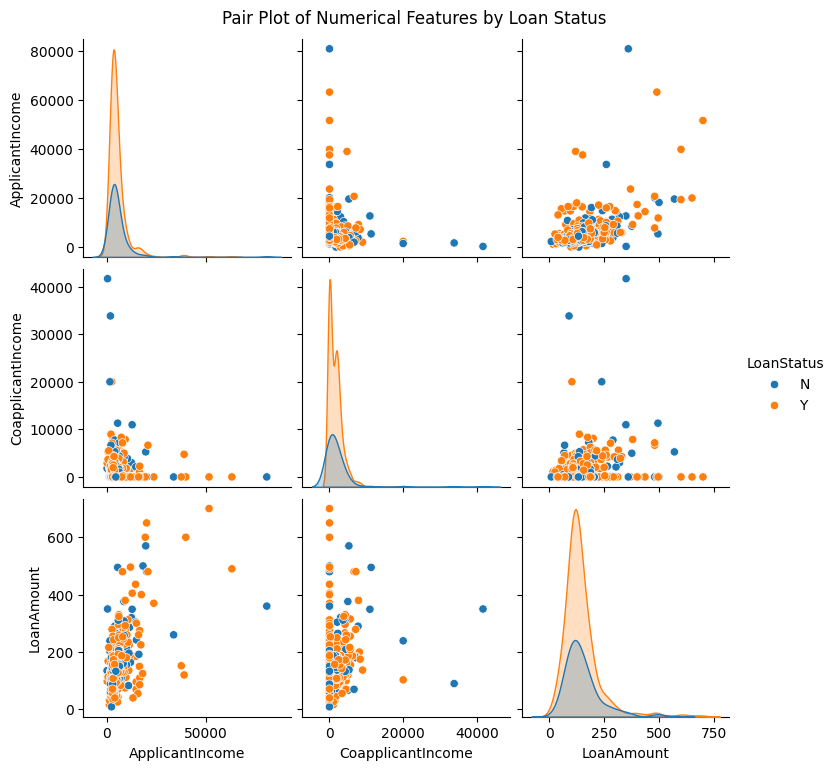

In [29]:
# relevant numerical columns
pairplot_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# copy original dataset
temp_df = df.copy()

# handle potential missing values in numerical columns for pairplot
pair_plot = temp_df.dropna(subset=pairplot_cols + ['LoanStatus']).copy()

if not pair_plot.empty:
    # create pairplot
    sns.pairplot(data=pair_plot,
                vars=pairplot_cols,
                hue='LoanStatus',
                diag_kind="kde", plot_kws={"palette": "mako"})

    
    plt.suptitle('Pair Plot of Numerical Features by Loan Status', y=1.02)
    plt.show()

#### **Analysis of Pair Plot**

##### **1. ApplicantIncome vs CoapplicantIncome**
**Key Observation:**
- The scatter plot shows a positive correlation between applicant income and co-applicant income.
- There are several high-income applicants points with correspondingingly high co-applicant incomes, indicating some applicants-co-applicant pairs have substantial combined incomes.
- A significant number of points have zero co-applicant income, indicating many applicants applications without a co-applicant or the co-applicant has no income.

**Key Takeaways:**
- Co-applicant income is generally lower than applicant income.
- The presence of high-income co-applicants points suggests some applicants-co-applicant pairs have substantial combined incomes.
- Many applicant applications without a co-applicant, which could be an important factor in loan approval.

**Decision / Action:**
- Create a binary feature (`Has_CoapplicantIncome`) to capture whether a co-applicant has income.
- Consider using total income (`ApplicantIncome + CoapplicantIncome`) as a more meaningful feature for modeling.
- Investigate if high co-applicant income correlates with higher loan amounts or better approval rates.


##### **2. ApplicantIncome vs LoanAmount**
**KeyObservation:**
- The scatter plot shows a positive correlation between applicant income and loan amount.
- Most applicants with higher incomes tend to request larger loans amounts.
- There are several outliers where applicant with moderate incomes request very large loan amounts, and vice versa.

**Key Takeaway:**
- Higher applicant income is associated with larger loan requests amounts.
- The relationship is not perfectly linear, indicating other factors also influence loan amount.
- Outliers suggest some applicant may be requesting loans amounts disproportionately high relative to their income.

**Decision / Action:**
- Calculate the `Income_to_Loan_Ratio` (LoanAmount / ApplicantIncome) as a new feature.
- Use this ratio to identify potentially risky loan requests where the amount requested is disproportionately high compared to income.
- Inspect if this ratio correlates with loan approval status.


##### **3. CoapplicantIncome vs LoanAmount**
**KeyObservation:**
- Similar to the previous plot, there is a positive correlation between co-applicant income and loan amount.
- Most applicant with higher co-applicant incomes tend to request larger loan amounts.
-There are several outliers where applicant with low co-applicant incomes request large loan amounts.

**KeyTakeaway:**
- Co-applicant income contributes to the ability to request larger loan amounts.
- The relationship is less strong than with applicant income, suggesting applicant income is the primary driver.
- Outliers indicate some applicant may rely heavily on co-applicant income for large loan requests.

**Decision / Action:**
- Use the same `Income_to_Loan_Ratio` calculation, but consider both applicant and co-applicant incomes.
- Create a `Total_Income_to_Loan_Ratio` feature to capture the combined financial capacity.
- Investigate if the co-applicant's contribution is more significant for certain types of loans or applicant profiles.

---

### **Overall Observations**

- **Combined Income Matters:** Both applicant and co-applicant incomes contribute to the ability to request larger loan amounts.
- **Outliers Exist:** There are cases where the loan amount requested seems disproportionately high or low relative to the applicant's income, which could be worth investigating further.
- **Feature Engineering Opportunity:** Creating features like `Total_Income`, `Income_to_Loan_Ratio`, and `Has_CoapplicantIncome` can provide valuable insights for the model.

### **Scatter Plot for feature influences the relationship.**

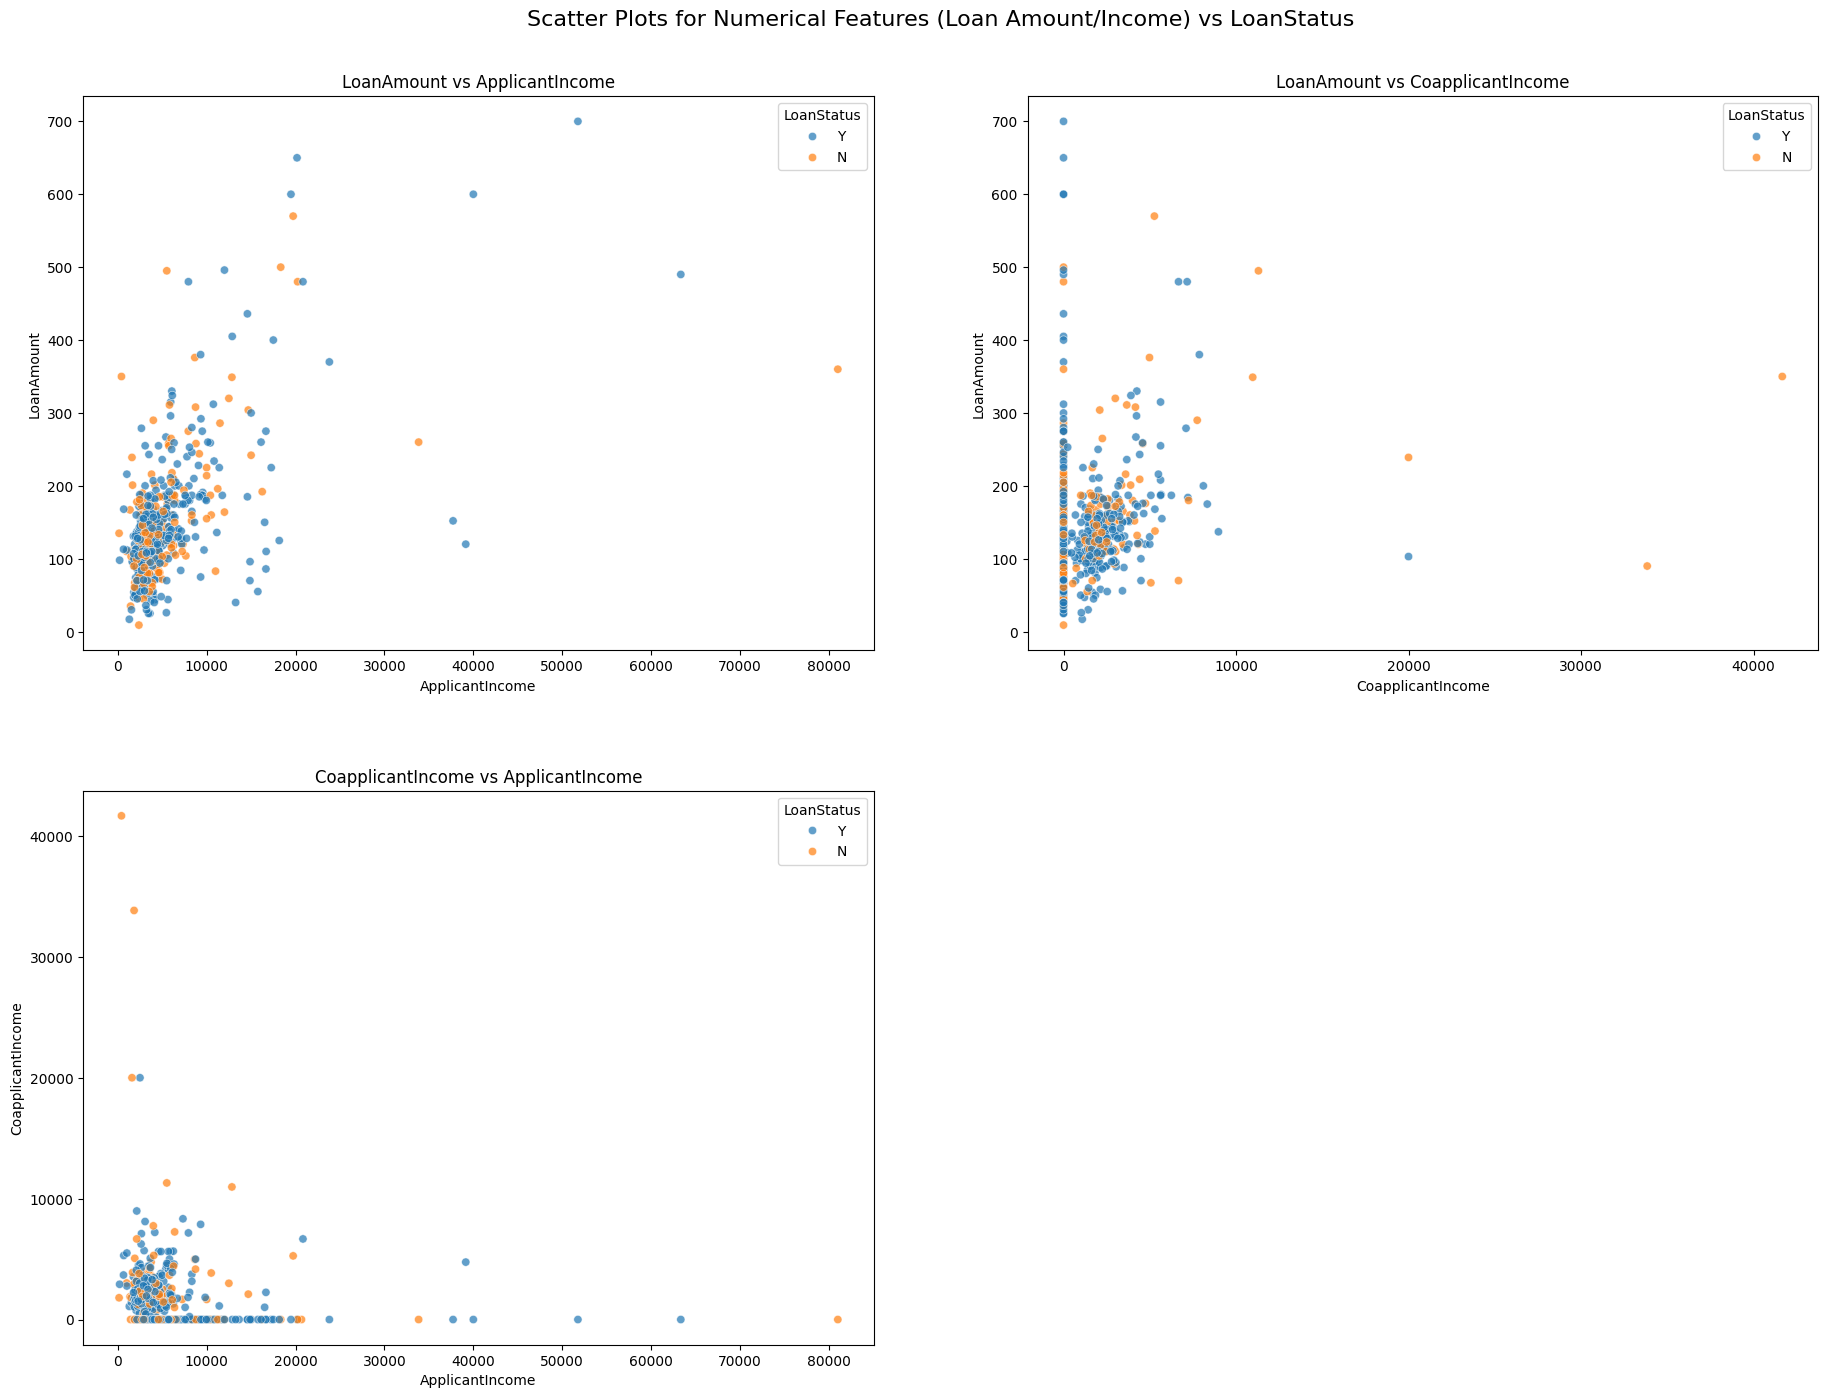

In [30]:
# Define the pairs of numerical columns for scatter plots ---
scatter_pairs = [
    ('ApplicantIncome', 'LoanAmount'),
    ('CoapplicantIncome', 'LoanAmount'),
    ('ApplicantIncome', 'CoapplicantIncome'),
    ]

# Set up the subplot grid
# Calculate rows needed for 2 columns
plots = len(scatter_pairs)
cols = 2
rows = (plots // cols) + 1

# Create subplots
# Flatten axes array for easier indexing, even if there's only one row
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten() if plots > 1 else [axes]

plt.tight_layout(pad=8.0)
fig.suptitle('Scatter Plots for Numerical Features (Loan Amount/Income) vs LoanStatus', fontsize=16)

# plot scatter plots
for i, (col_x, col_y) in enumerate(scatter_pairs):
    sns.scatterplot(data=df,
                    x=col_x,
                    y=col_y,
                    ax=axes[i],
                    hue='LoanStatus',
                    alpha=0.7)
    
    axes[i].set_title(f'{col_y} vs {col_x}')

# remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

#### **Analysis of Scatterplot**

##### **1. LoanAmount vs ApplicantIncome**
**Key Observation:**
- The scatter plot shows a positive correlation between applicant income and loan amount.
- Most applicants with higher incomes tend to request larger loan amounts.
- There are several outliers where applicant with moderate incomes request very large loan amounts, and vice versa.

**Key Takeaways:**
- Higher applicant income is associated with larger loan requests amounts.
- The relationship is not perfectly linear, indicating other factors also influence loan amount.
- Outliers suggest some applicant may be requesting loan amounts disproportionately high relative to their income.

**Decision / Action:**
- Calculate the `Income_to_Loan_Ratio` (LoanAmount / ApplicantIncome) as a new feature.
- Use this ratio to identify potentially risky loan request where the amount requested is disproportionately high compared to income.
- Investigate if this ratio correlates with loan approval status.



##### **2. LoanAmount vs CoapplicantIncome**
**Key Observation:**
- Similar to the previous plot, there is a positive correlation between co-applicant income and loan amount.
- Most applicant with higher co-applicant incomes tend to request larger loan amounts.
- There are several outliers where applicant with low co-applicant incomes request large loan amounts.

**Key Takeaway:**
- Co-applicant income contributes to the ability to request larger loan amounts.
- The relationship is less strong than with applicant income, suggesting applicant income is the primary driver.
- Outliers indicate some applicant may rely heavily on co-applicant income for large loan requests.

**Decision / Action:**
- Use the same `Income_to_Loan_Ratio` calculation, but consider both applicant and co-applicant incomes.
- Create a `Total_Income_to_Loan_Ratio` feature to capture the combined financial capacity.
- Investigate if the co-applicant's contribution is more significant for certain types of loans or applicant profiles.


##### **3. CoapplicantIncome vs ApplicantIncome**
**Key Observation:**
- The scatter plot shows a positive correlation between applicant income and co-applicant income.
- There are several high-income applicant points with corresponding high co-applicant incomes, indicating some applicant-co-applicant pairs have substantial combined incomes.
- A significant number of points have zero co-applicant income, indicating many applicant applications without a co-applicant or the co-applicant has no income.

**Key Takeaway:**
- Co-applicant income is generally lower than applicant income.
- The presence of high-income co-applicants points suggests some applicant-co-applicant pairs have substantial combined incomes.
- Many applicant apply without a co-applicant, which could be an important factor in loan approval.

**Decision / Action:**
- Create a binary feature (`Has_CoapplicantIncome`) to capture whether a co-applicant has income.
- Consider using total income (`ApplicantIncome + CoapplicantIncome`) as a more meaningful feature for modeling.
- Investigate if high co-applicant income correlates with higher loan amounts or better approval rates.

---

##### **Overall Observations**

- **Combined Income Matters:** Both applicant and co-applicant incomes contribute to the ability to request larger loan amounts.
- **Outliers Exist:** There are cases where the loan amount requested seems disproportionately high or low relative to the applicant's income, which could be worth investigating further.
- **Feature Engineering Opportunity:** Creating features like `Total_Income`, `Income_to_Loan_Ratio`, and `Has_CoapplicantIncome` can provide valuable insights for the model.

### **Grouped Bar Chart for Approval Rate Combination**

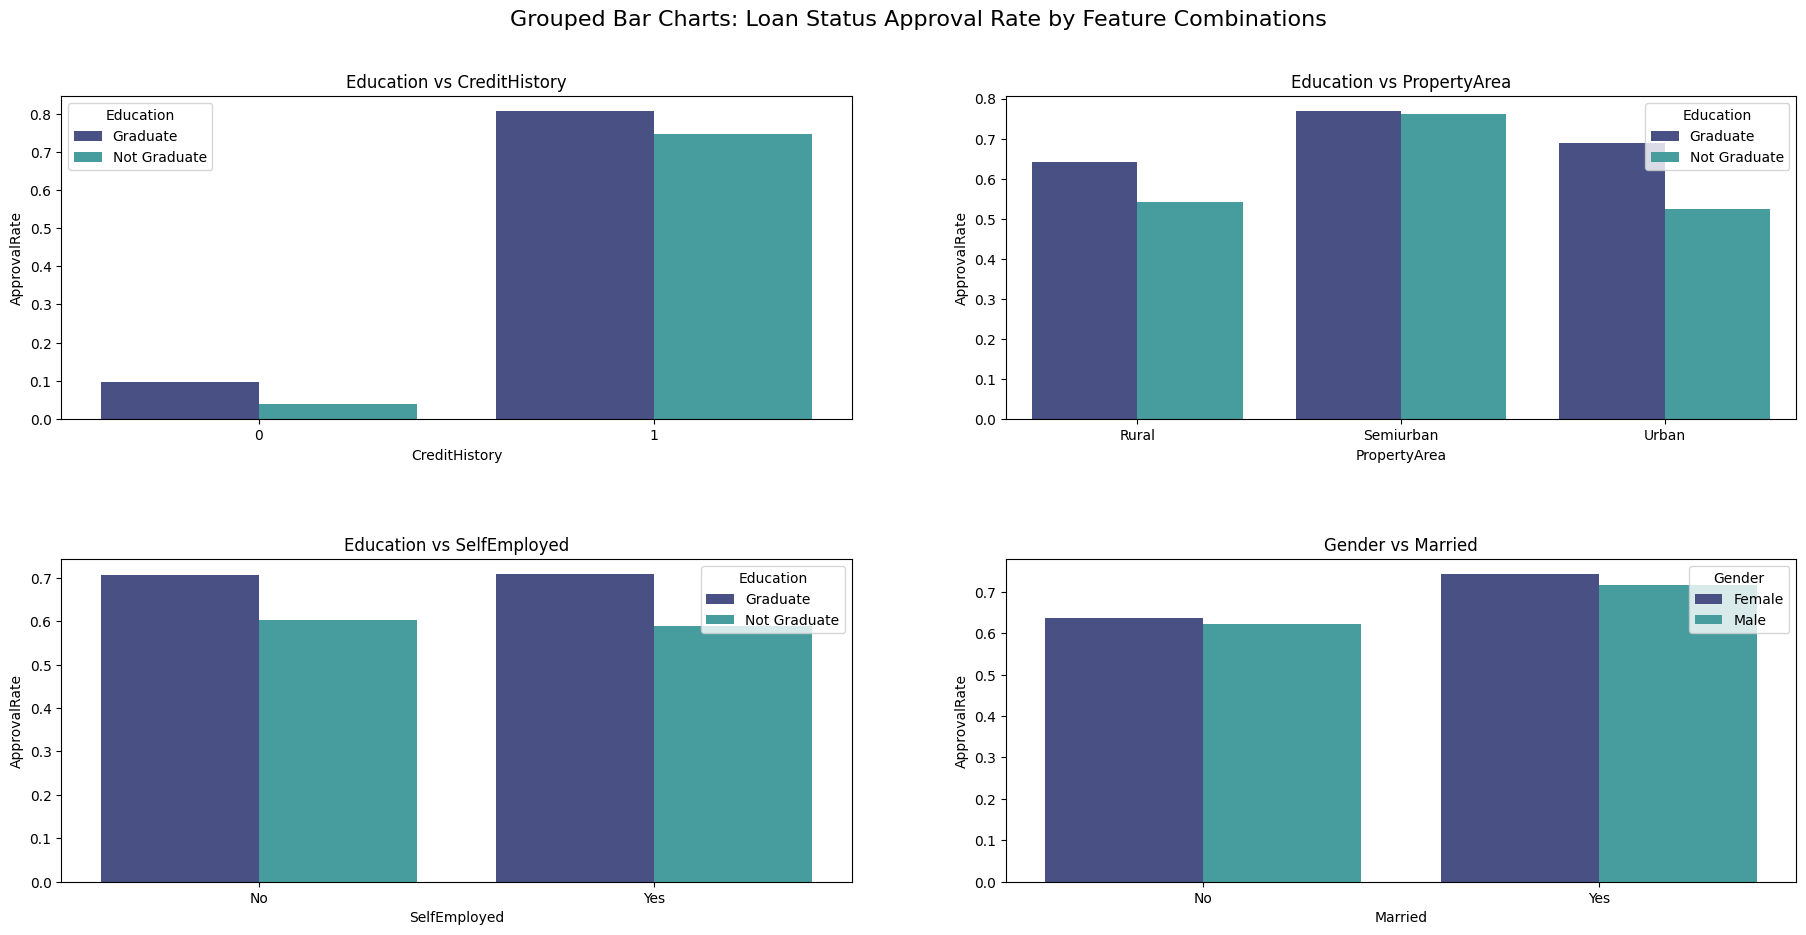

In [31]:
# define the pairs of numerical columns for scatter plots ---
grouped_bar = [
    ('CreditHistory', 'Education'),
    ('PropertyArea', 'Education'),
    ('SelfEmployed', 'Education'),
    ('Married', 'Gender'),
    ]

# set up the subplot grid
# calculate rows needed for 2 columns
plots = len(grouped_bar)
cols = 2
rows = (plots // cols) + 1

# filter data to relavant columns and drop rows with missing values in these columns
cols_needed = ['LoanStatus']
for col1, col2 in grouped_bar:
    cols_needed.extend([col1, col2])

df_filtered = df.dropna(subset=cols_needed)


if not df_filtered.empty:
    # create subplots
    # flatten axes array for easier indexing, even if there's only one row
    fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
    axes = axes.flatten() if plots > 1 else [axes]

    plt.tight_layout(pad=8.0)
    fig.suptitle('Grouped Bar Charts: Loan Status Approval Rate by Feature Combinations', fontsize=16)

    # calculate approval rate (Loan_Status == 'Y')
    for i, (col_x, col_y) in enumerate(grouped_bar):

        # group by both categorical features and LoanStatus, count occurrences
        group_counts = df.groupby([col_x, col_y, 'LoanStatus']).size().reset_index(name='Count')

        # pivot to have LoanStatus as columns for easier calculation
        pivot_counts = group_counts.pivot_table(index=[col_x, col_y], columns='LoanStatus', values='Count', fill_value=0).reset_index()
        
        # calculate total counts per group
        pivot_counts['Total'] = pivot_counts.get('Y', 0) + pivot_counts.get('N', 0)

        # calculate approval rate    
        pivot_counts['ApprovalRate'] =  np.where(pivot_counts['Total'] > 0, pivot_counts['Y'] / pivot_counts['Total'], 0)

        # merge back with original group labels
        # approval_rates = df_filtered.groupby([col_x, col_y]).size().reset_index(name='TotalGroup')
        # merged_rates = approval_rates.merge(pivot_counts[[col_x, col_y, 'ApprovalRate']], on=[col_x, col_y], how='left')

        plot_data = pivot_counts[[col_x, col_y, 'ApprovalRate']]

        # create bar plot
        sns.barplot(data=plot_data,
                    x=col_x,
                    y='ApprovalRate',
                    hue=col_y,
                    ax=axes[i],
                    palette="mako")

        axes[i].set_title(f'{col_y} vs {col_x}')

    
# remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

#### **Analysis of Grouped Bar Chart**

##### **1. Education vs CreditHistory**
**Key Observation:**
- The approval rate is significantly higher for applicantsants with a good credit history (CreditHistory = 1).
- For applicantsants with a good credit history, the approval rate is very high for both graduates and non-graduates.
- For applicantants with a poor credit history (CreditHistory = 0), the approval rate is extremely low for both groups.

**Key Takeaway:**
- Credit history is a dominant factor in loan approval, far outweighing education level.
- Even if an applicantant is a graduate, a poor credit history drastically reduces their chances of approval.
- This suggests that lendersers place a high emphasis on past financial behavior when making decisionsions.

**Decision / Action:**
- Use `CreditHistory` as a primary filter or feature in the model.
- Consider using it to segment the data before applying other models.
- Investigate if there are any specific reasons why some graduates with poor credit history might still be approved.

##### **2. Education vs PropertyArea**
**Key Observation:**
- The approval rate varies by property area but not dramatically between education levels.
- In Semiurban areas, the approval rate is highest for both graduates and non-graduates.
- In Urban areas, the approval rate is slightly lower than in Semiurban area.
- In Rural area, the approval rate is lowest overall.

**Key Takeaway:**
- Property area has a moderate impact on approval rates.
- There is no clear advantage for graduates over non-graduates across all property areas types.
- The semiurban area appears to have the most favorable conditions for loan approval.

**Decision / Action:**
- Include `PropertyArea` in the model, as it shows a meaningful relationship with the target variable.
- Consider creating a binary feature for "Semiurban" vs "Other" if the difference is significant enough.
- Investigate if there are economic factors in semiurban areas that make it more attractive for lenders.

##### **3. Education vs SelfEmployed**
**Key Observation:**
- The approval rate is slightly higher for graduates compared to non-graduates in both employment categories.
- For self-employed individuals, the approval rate is similar for both education levels.
- For salaried individuals (not self-employed), the approval rate is also similar for both education levels.

**Key Takeaway:**
- Employment status does not appear to have a strong interaction with education level.
- While education level shows a slight preference for graduates, the difference is small.
- Self-employed status seems to have a more significant impact on approval rates than education level.

**Decision / Action:**
- Include `SelfEmployed` in the model, as it shows a meaningful relationship with the target variable.
- Consider using it as a separate feature rather than interacting it with education.
- Investigate if there are any specific challenges for self-employed individuals that affect approval rates.

##### **4. Gender vs Married**
**Key Observation:**
- The approval rate is slightly higher for males compared to females applicants.
- The approval rate is higher for married applicants compared to unmarried applicants.
- The difference in approval rates between genders is consistent across marital status.

**Key Takeaway:**
- Both gender and marital status have a moderate impact on approval rates.
- Being married appears to be associated with a higher chance of approval.
- The slight gender gap in approval rates might warrant further investigation to ensure fairness.

**Decision / Action:**
- Include both `Gender` and `Married` in the model, as they show meaningful relationships with the target variable.
- Consider creating a combined feature for "Married Male" or "Married female" if the interaction is significant.
- Investigate if there are any underlying factors (e.g., income) that explain the gender gap in approval rates.

---

##### **Overall Observations**

- **Credit History is the Strongest Predictor:** It has the most dramatic effect on approval rates, often overriding other factors like education.
- **Education Has a Moderate Effect:** While graduates have a slight edge, the difference is not as pronounced as other factors.
- **Property Area Matters:** The location of the property influences approval rates, with semiurban areas being the most favorable.
- **Marital Status and Employment Status Matter:** Being married and having a stable job (not self-employed) are associated with higher approval rates.
- **Feature Engineering Opportunity:** Creating interaction terms like `CreditHistory * Education` or `Married * Gender` could capture complex relationships.

### **Faceted Plots for multi-dimensional relationships**

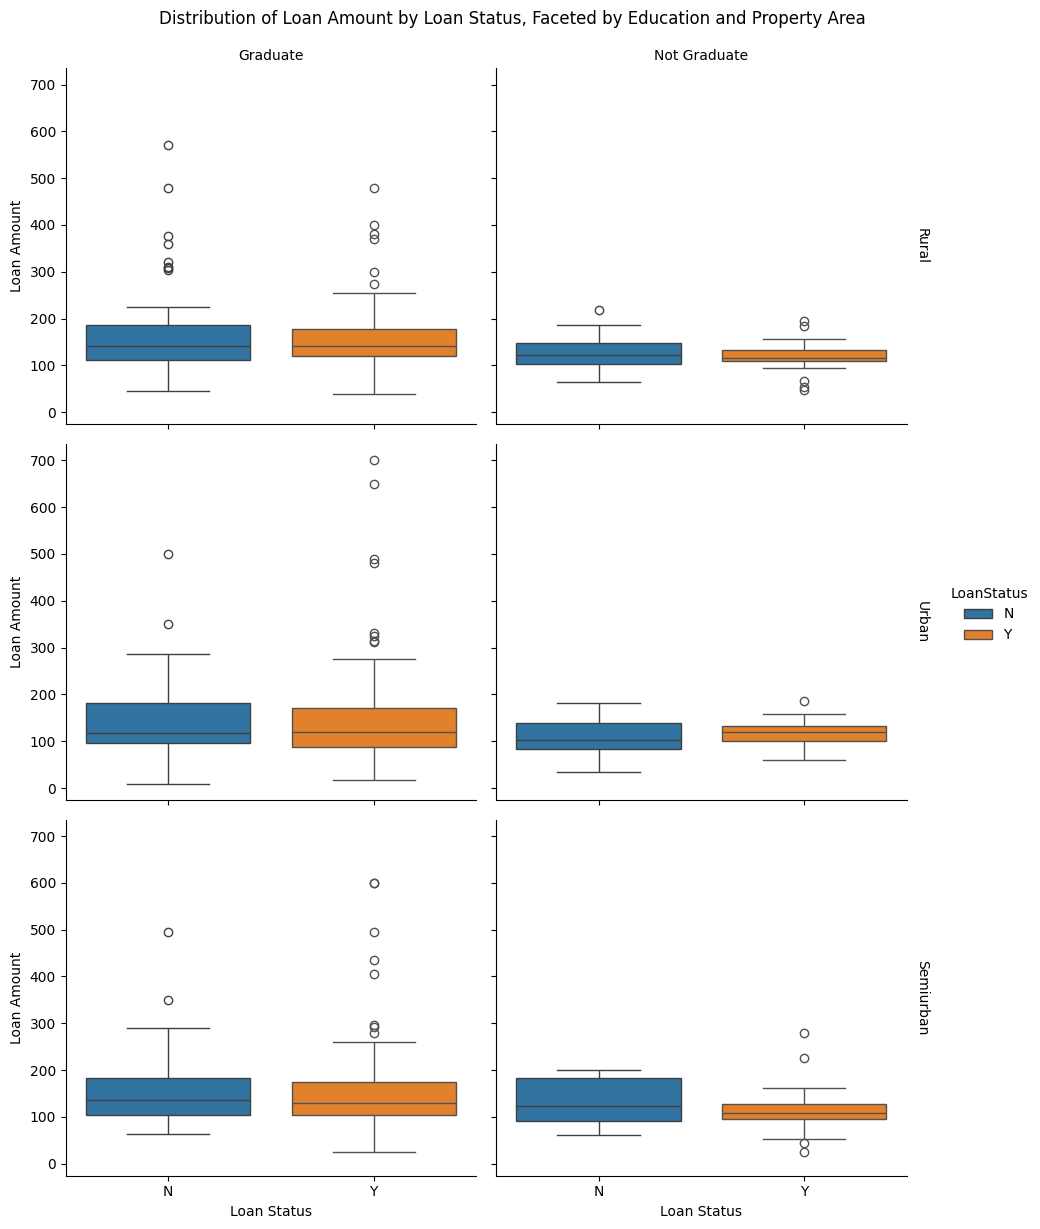

In [32]:
""" Faceted by Education and Property Area """

# handle potential missing values in numerical columns for faceted plots
temp_df = df.dropna(subset=['Education', 'PropertyArea', 'LoanAmount', 'LoanStatus']).copy()

if not temp_df.empty:
    # create faceted plots
    g = sns.FacetGrid(temp_df,
                      col="Education",
                      row="PropertyArea",
                      hue='LoanStatus',
                      margin_titles=True,
                      height=4,
                      aspect=1.2)

    # map a distribution plot
    g.map(sns.boxplot, 'LoanStatus', 'LoanAmount')
    g.add_legend()
    g.fig.suptitle(f'Distribution of Loan Amount by Loan Status, Faceted by Education and Property Area', y=1.02)
    g.set_axis_labels("Loan Status", "Loan Amount")
    g.set_titles(col_template="{col_name}", row_template="{row_name}")

    plt.show()


#### **Analysis of Faceted Plot - Faceted by Education and Property Area**

##### **1. Graduate vs Not Graduate (Rural Area)**
**Key Observation:**
- The median loan amount for both graduates and non-graduates in rural areas is similar, around 150.
- The interquartile range (IQR) is slightly wider for graduates, indicating more variability in loan amounts.
- There are several outliers for both groups, with some applicants requesting very large loan amounts.

**Key Takeaway:**
- Education level does not appear to have a significant impact on the distribution of loan amounts in rural areas.
- The presence of outliers suggests that some applicants may be requesting unusually large loan amounts regardless of education level.

**Decision / Action:**
- Consider using total income or other financial metrics instead of education alone to predict loan amounts.
- Investigate if there are any specific reasons why some applicants request such large loan amounts.


##### **2. Graduate vs Not Graduate (Urban Area)**
**Key Observation:**
- The median loan amount for both graduates and non-graduates in urban areas is similar, around 150.
- The IQR is slightly wider for graduates, indicating more variability in loan amounts.
- There are several outliers for both groups, with some applicants requesting very large loan amounts.

**Key Takeaway:**
- Education level does not appear to have a significant impact on the distribution of loan amounts in urban areas.
- The presence of outliers suggests that some applicants may be requesting unusually large loan amounts regardless of education level.

**Decision / Action:**
- Consider using total income or other financial metrics instead of education alone to predict loan amounts.
- Investigate if there are any specific reasons why some applicants request such large loan amounts.


##### **3. Graduate vs Not Graduate (Semiurban Area)**
**Key Observation:**
- The median loan amount for both graduates and non-graduates in semiurban areas is similar, around 150.
- The IQR is slightly wider for graduates, indicating more variability in loan amounts.
- There are several outliers for both groups, with some applicants requesting very large loan amounts.

**Key Takeaway:**
- Education level does not appear to have a significant impact on the distribution of loan amounts in semiurban areas.
- The presence of outliers suggests that some applicants may be requesting unusually large loan amounts regardless of education level.

**Decision / Action:**
- Consider using total income or other financial metrics instead of education alone to predict loan amounts.
- Investigate if there are any specific reasons why some applicantants request such large loan amounts.

---

### **Overall Observations**

- **Education Level Has Minimal Impact:** Across all property areas types, the median loan amount and IQR are very similar for graduates and non-graduates.
- **Property Area Matters:** The distribution of loan amounts varies by property area, with urban areas showing the highest median and IQR.
- **Outliers Exist:** There are cases where the loan amount requested is disproportionately high relative to the median, which could be worth investigating further.
- **Feature Engineering Opportunity:** Creating features like `Total_Income` or `Income_to_Loan_Ratio` might capture more meaningful information than education level alone.

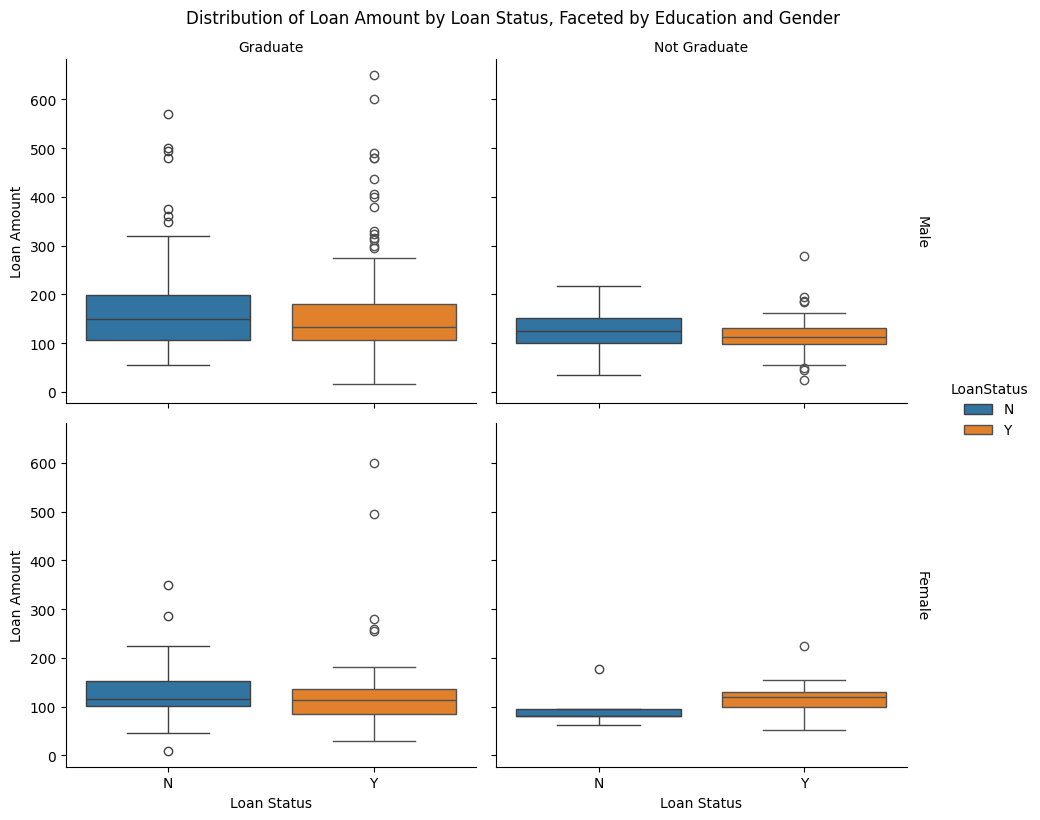

In [33]:
""" Faceted by Education and Gender """

# handle potential missing values in numerical columns for faceted plots
temp_df = df.dropna(subset=['Education', 'Gender', 'LoanAmount', 'LoanStatus']).copy()

if not temp_df.empty:
    # create faceted plots
    g = sns.FacetGrid(temp_df,
                      col="Education",
                      row="Gender",
                      hue='LoanStatus',
                      margin_titles=True,
                      height=4,
                      aspect=1.2)

    # map a distribution plot
    g.map(sns.boxplot, 'LoanStatus', 'LoanAmount')
    g.add_legend()
    g.fig.suptitle(f'Distribution of Loan Amount by Loan Status, Faceted by Education and Gender', y=1.02)
    g.set_axis_labels("Loan Status", "Loan Amount")
    g.set_titles(col_template="{col_name}", row_template="{row_name}")

    plt.show()


#### **Analysis of Faceted Plot - Faceted by Education and Gender**

##### **1. Graduate vs Not Graduate (Male)**
**Key Observation:**
- The median loan amount for both graduates and non-graduates in male applicants is similar, around 200.
- The interquartile range (IQR) is slightly wider for graduates, indicating more variability in loan amounts.
- There are several outliers for both groups, with some applicantants requesting very large loan amounts.

**Key Takeaway:**
-Educationation level does not appear to have a significant impact on the distribution of loan amounts in male applicantants.
- The presence of outliers suggests that some applicantants may be requesting unusually large loan amounts regardless of education level.

**Decision / Action:**
- Consider using total income or other financial metrics instead of education alone to predict loan amounts.
- Investigate if there are any specific reasons why some applicants request such large loan amounts.


##### **2. Graduate vs Not Graduate (Female)**
**Key Observation:**
- The median loan amount for both graduate and non-graduates in female applicantants is similar, around 150.
- The IQR is slightly wider for graduate, indicating more variability in loan amounts.
- There are fewer outliers compared to male applicants.

**Key Takeaway:**
- Education level does not appear to have a significant impact on the distribution of loan amounts in female applicants.
- The overall loan amounts requested by female applicants are lower than those requested by male applicants.

**Decision / Action:**
- Consider using total income or other financial metrics instead of education alone to predict loan amounts.
- Investigate if there are any specific reasons why female applicantants request lower loan amounts.

---

### **Overall Observations**

- **Education Level Has Minimal Impact:** Across all gender types, the median loan amount and IQR are very similar for graduates and non-graduates.
- **Gender Matters:** Male applicants tend to request higher loan amounts than female applicants.
- **Outliers Exist:** There are cases where the loan amount requested is disproportionately high relative to the median, which could be worth investigating further.
- **Feature Engineering Opportunity:** Creating features like `Total_Income` or `Income_to_Loan_Ratio` might capture more meaningful information than education level alone.

### **Heatmap of correlation Matrix**

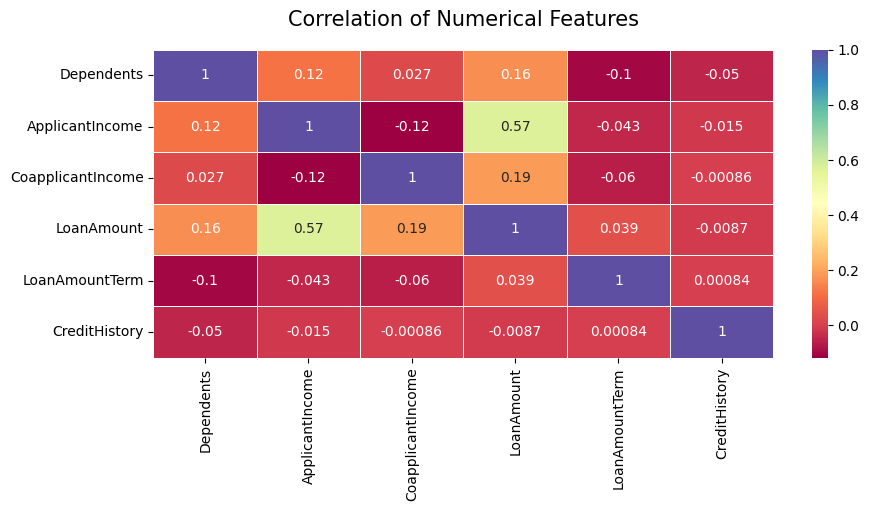

In [34]:
""" Correlation Matrix Heatmap for Numerical Features """
# figure size
plt.figure(figsize=(10, 4))

# correlation heatmap for numerical columns
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, cmap="Spectral", linewidths=0.5)
plt.title("Correlation of Numerical Features", fontsize=15,  y=1.05)

# show plot
plt.show()

#### **Analysis of the Heatmap (Numerical Features Association)**

**Key Observations**

- *Strongest Correlation:* The strongest positive correlation is between `ApplicantIncome` and `LoanAmount` (0.57). This indicates that higher applicant income is strongly associated with larger loan request amounts.
- *Weakest Correlations:* Most other correlations are very weak (|r| < 0.2), suggesting minimal linear relationships between the remaining numerical features.
- *No Significant Negative Correlations:* There are no strong negative correlations. The weakest positive correlation is between `CoapplicantIncome` and `CreditHistory` (0.00086).

**Key Takeaways**

- *Applicant Income is Key:* Applicant income is the primary driver for the loan amount requested.
- *Other Features are Less Related:* Features like number of dependents, co-applicant income, loan term, and credit history have minimal direct linear impact on each other in this dataset.

**Decision / Action**

- *Keep `ApplicantIncome`:* This feature is crucial and should be included in the model.
- *Consider Removing Other Numerical Features:* Due to their very weak correlations, features like `CoapplicantIncome`, `Dependents`, and `CreditHistory` might not add much predictive power on their own. However, they could still be important when combined with other factors (e.g., a low credit history might still be a significant risk factor even if it doesn't correlate linearly with income).
- *Feature Engineering Opportunity:* Create new features like `TotalIncome` (ApplicantIncome + CoapplicantIncome) which might capture more meaningful information than the individual features.

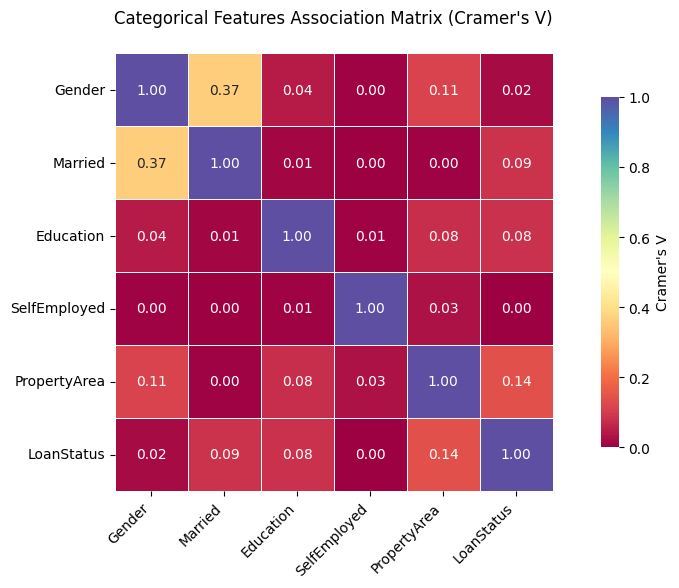

In [35]:
""" Categorical Features Association Matrix (Cramer's V)"""
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# create categorical association matrix (Cramer's V)
# initialize an empty DataFrame for the Cramer's V matrix
cramers_v_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols, dtype=float)

# calculate Cramer's V for each pair of categorical features
for i, col1 in enumerate(categorical_cols):
    for j, col2 in enumerate(categorical_cols):
        if col1 == col2:
            # correlation of a variable with itself is 1
            cramers_v_matrix.loc[col1, col2] = 1.0
        
        # calculate only for the upper triangle to save time, then mirror
        elif i < j:
            # create a contingency table
            contingency_table = pd.crosstab(df[col1], df[col2])
            
            # perform Chi-Square test
            try:
                chi2, p_val, dof, expected = chi2_contingency(contingency_table)
                
                # calculate Cramer's V (total number of observations)
                n = contingency_table.sum().sum()
                
                # use the minimum of (rows-1) and (cols-1) for k
                k = min(contingency_table.shape) - 1 
                
                if k > 0 and n > 0:
                    cramers_v = np.sqrt(chi2 / (n * k))
                
                else:
                    cramers_v = 0
                
                cramers_v_matrix.loc[col1, col2] = cramers_v
                cramers_v_matrix.loc[col2, col1] = cramers_v
            
            except ValueError:
                 # handle cases where chi2_contingency might fail
                 cramers_v_matrix.loc[col1, col2] = 0
                 cramers_v_matrix.loc[col2, col1] = 0

# fill any remaining NaNs
cramers_v_matrix = cramers_v_matrix.fillna(0)

# plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    cramers_v_matrix.astype(float),
    annot=True, 
    fmt=".2f",
    cmap='Spectral',
    vmin=0,
    vmax=1,
    square=True, 
    linewidths=0.5,
    cbar_kws={"shrink": .8, "label": "Cramer's V"}
)

plt.title("Categorical Features Association Matrix (Cramer's V)", y=1.05)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### **Analysis of the Heatmap (Categorical Features Association)**

**Key Observations**
- *Strongest Correlation:* The strongest association is between `Gender` and `Married` (Cramer's V = 0.365). This indicates a moderate relationship, suggesting that being male or female is somewhat linked to marital status.
- *Weakest Correlations:* Most other associations are very weak (Cramer's V < 0.1), indicating minimal relationships between the remaining categorical features.
- *No Significant Negative Associations:* There are no negative associations in this matrix since Cramer's V is always non-negative.
- *PropertyArea and LoanStatus:* The second strongest association is between `PropertyArea` and `LoanStatus` (Cramer's V = 0.140), suggesting property location has a noticeable impact on approval rates.

**Key Takeaways**
- *Marriage and Property Area Matter:* These two features show the strongest associations with the target variable (`LoanStatus`).
- *Gender has minimal impact:* The association between gender and loan approval is extremely weak, which is a good indicator of fairness.
- *Feature Engineering Opportunity:* While individual categorical features show weak associations, combining them (e.g., "Married male") might reveal stronger patterns.

**Decision / Action**
- *Keep `Married` and `PropertyArea`:* These features are crucial and should be included in the model.
- *Consider Removing Other Categorical Features:* Due to their very weak correlations, features like `Educationation`, `SelfEmployed`, and `Gender` might not add much predictive power *on their own*. However, they could still be important when combined with other factors.
- *Feature Engineering Opportunity:* Create new features like `TotalIncome` (ApplicantIncome + CoapplicantIncome), which might capture more meaningful information than the individual features.

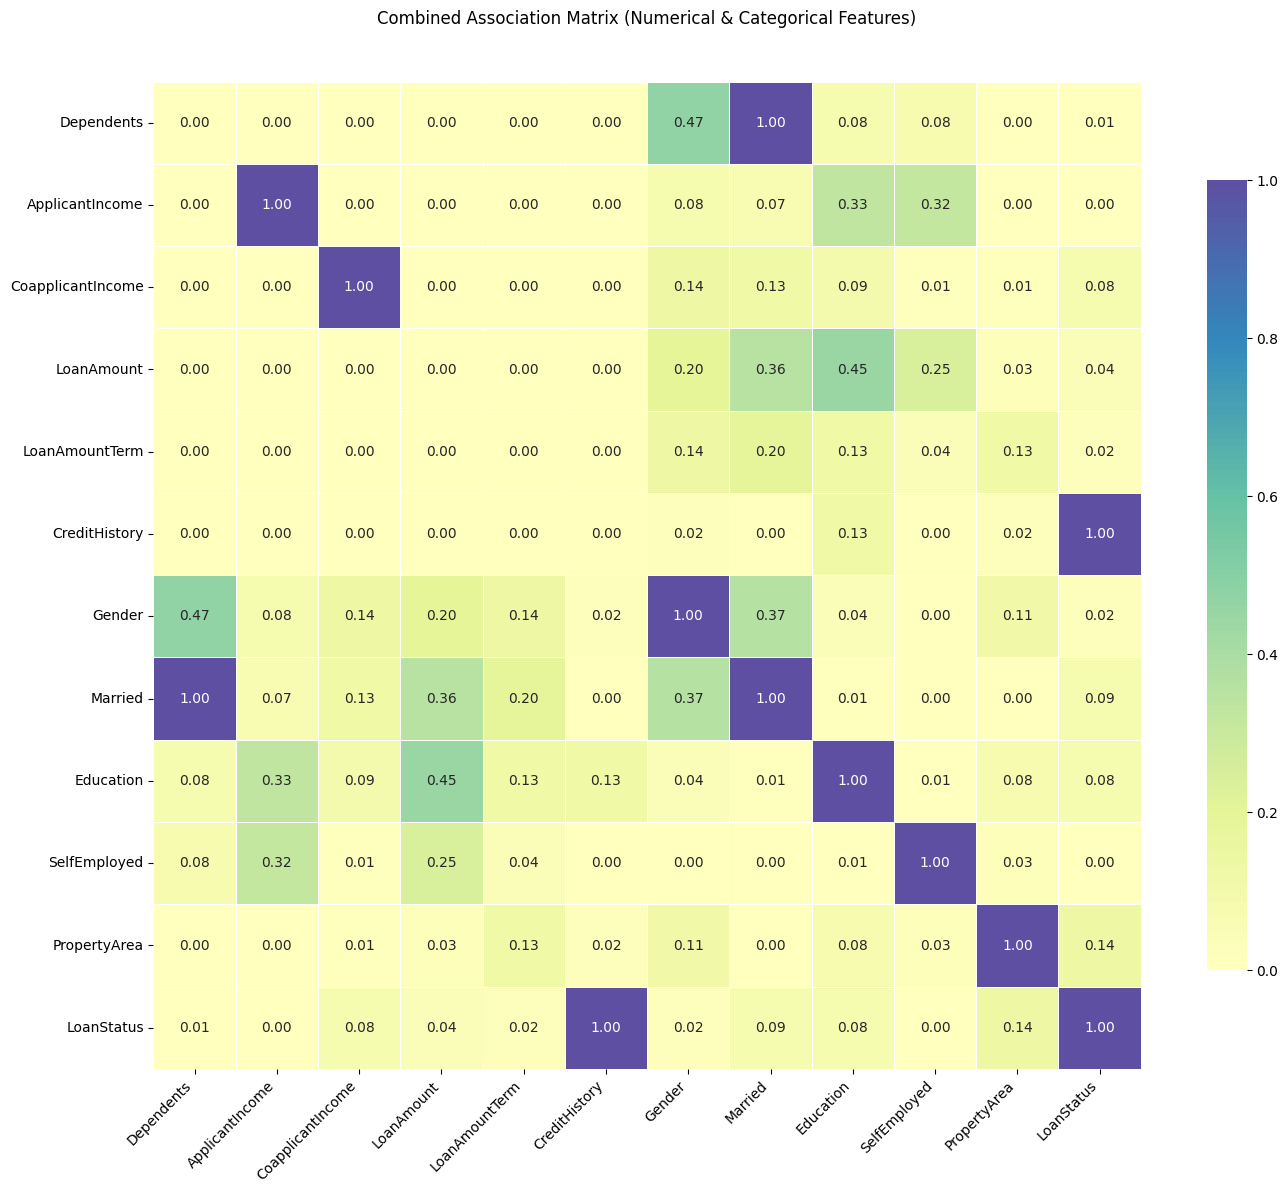

In [36]:
""" Combined Association Matrix (Numerical & Categorical Features) """

# drop rows with missing values in the columns we'll analyze
temp_df = df.copy()

# identify numerical columns
numerical_cols = temp_df.select_dtypes(include="number").columns.tolist()

# identify categorical columns
categorical_cols = temp_df.select_dtypes(include=['object']).columns.tolist()

# create a Combined Correlation/Association Matrix
# initialize an empty DataFrame for the association matrix
# include all feature columns and the target
all_columns = numerical_cols + categorical_cols
correlation_matrix = pd.DataFrame(index=all_columns, columns=all_columns)


# fill in numerical-numerical correlations (Spearman)
for i, col1 in enumerate(numerical_cols):
    for j, col2 in enumerate(numerical_cols):
        if col1 == col2:
            correlation_matrix.loc[col1, col2] = 1.0
            
            # handle potential constant columns which cause spearmanr to fail
            if temp_df[col1].nunique() > 1 and temp_df[col2].nunique() > 1:
                corr, _ = spearmanr(temp_df[col1], temp_df[col2])
                correlation_matrix.loc[col1, col2] = corr
            
            else:
                correlation_matrix.loc[col1, col2] = 0      # No correlation if one is constant


# fill in categorical-categorical associations (using Chi-Square strength)
for i, col1 in enumerate(categorical_cols):
    for j, col2 in enumerate(categorical_cols):
        if col1 == col2:
            correlation_matrix.loc[col1, col2] = 1.0
        else:
            # create a contingency table
            cont_table = pd.crosstab(temp_df[col1], temp_df[col2])
            
            # perform Chi-Square test
            try:
                chi2, p_val, dof, expected_freq = chi2_contingency(cont_table)
                
                # calculate Cramer's V for strength (standardized measure)
                n = cont_table.sum().sum()
                
                # use the minimum of (rows-1) and (cols-1) for k
                k = min(cont_table.shape) - 1 
                
                if k > 0 and n > 0:
                    cramers_v = np.sqrt(chi2 / (n * k))
                
                else:
                    cramers_v = 0
                
                correlation_matrix.loc[col1, col2] = cramers_v
            
            except ValueError:
                 # handle cases where chi2_contingency might fail (e.g., empty tables)
                 correlation_matrix.loc[col1, col2] = 0


# fill in categorical-numerical relationships 
for i, cat_col in enumerate(categorical_cols):
    for j, num_col in enumerate(numerical_cols):
        # group the numerical data by the categorical variable
        # handle potential missing categories or groups
        try:
            groups = [group[num_col].dropna() for name, group in temp_df.groupby(cat_col) if not group[num_col].dropna().empty]
            
            # ensure we have at least two non-empty groups to compare
            if len(groups) >= 2:
                
                # perform One-Way ANOVA
                f_stat, p_val = f_oneway(*groups) # Unpack the list of groups
                
                # calculate Eta Squared (effect size) as a measure of association strength
                # Eta^2 = SS_between / SS_total
                # SS_total = SS_between + SS_within
                if p_val > 0:
                     # use -log10(p) capped at 10 for visualization purposes (higher means stronger association)
                     assoc_strength = min(10, -np.log10(p_val)) / 10        # Scale to 0-1 for consistency
                
                else:
                     assoc_strength = 1.0                                   # Very strong association if p=0
                
                # assign to matrix (symmetrically)
                correlation_matrix.loc[cat_col, num_col] = assoc_strength

                # matrix is symmetric for this measure
                correlation_matrix.loc[num_col, cat_col] = assoc_strength
            
            else:
                correlation_matrix.loc[cat_col, num_col] = 0
                correlation_matrix.loc[num_col, cat_col] = 0
        
        except Exception as e:
             # handle any other potential errors during grouping or ANOVA
             print(f"Warning: Could not calculate association for {cat_col} vs {num_col}: {e}")
             correlation_matrix.loc[cat_col, num_col] = 0
             correlation_matrix.loc[num_col, cat_col] = 0


# plot the heatmap
# fill any remaining NaNs with 0 for plotting
correlation_matrix = correlation_matrix.fillna(0)

plt.figure(figsize=(15, 12))
sns.heatmap(
    correlation_matrix.astype(float),
    annot=True, 
    fmt=".2f",
    cmap='Spectral', 
    center=0,
    square=True, 
    linewidths=0.5,
    cbar_kws={"shrink": .8},
)


plt.title('Combined Association Matrix (Numerical & Categorical Features)', y=1.05)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# **Handling Missing Values**

## KNN Imputation for numerical Features

In [37]:
# numerical columns
num_cols = df.select_dtypes(include="number").columns

# select columns that have null values
null_cols = [col for col in num_cols if df[col].isnull().any() == True]

# initialize the KNN imputer with 5 nearest neighbour
imputer = KNNImputer(n_neighbors=5)

# imputing missing values
for col in null_cols:
    df[col] = imputer.fit_transform(df[[col]])

In [38]:
# check missing value status in numerical features
df.select_dtypes(include="number").isnull().sum()

Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
LoanAmountTerm       0
CreditHistory        0
dtype: int64

## Mode Imputation for Categorical Features

In [39]:
# categorical columns
cat_cols = df.select_dtypes(include="object").columns

# use mode imputation for categorical columns
for col in cat_cols:
    if df[col].isnull().any():
        mode_val = df[col].mode()

        if not mode_val.empty:
            df[col].fillna(mode_val[0], inplace=True)
            
        else:
            # if mode is empty, fill with a placeholder
            df[col].fillna('Unknown', inplace=True)
            print(f"  Filled missing values in '{col}' with 'Unknown'.")

In [40]:
# Missing value status
print("-" * 40)
print("Missing Values After Handling")
print("-" * 40)
print(df.isnull().sum())
print("-" * 40)

----------------------------------------
Missing Values After Handling
----------------------------------------
Gender               0
Married              0
Dependents           0
Education            0
SelfEmployed         0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
LoanAmountTerm       0
CreditHistory        0
PropertyArea         0
LoanStatus           0
dtype: int64
----------------------------------------


# **Outliers Treatment**

## Outliers Treatment using IQR Method

In [41]:
# function to getting wisker
def wisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lower_wisker = q1 - 1.5 * iqr
    upper_wisker = q3 + 1.5 * iqr

    return lower_wisker, upper_wisker

In [42]:
# columns that needs outlier treatment
ol_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# outliers treatment
for col in ol_cols:
    # lower and upper wisker
    lower_bound, upper_bound = wisker(df[col])

    # Cap Outliers (Winsorization)
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

## Check Outliers

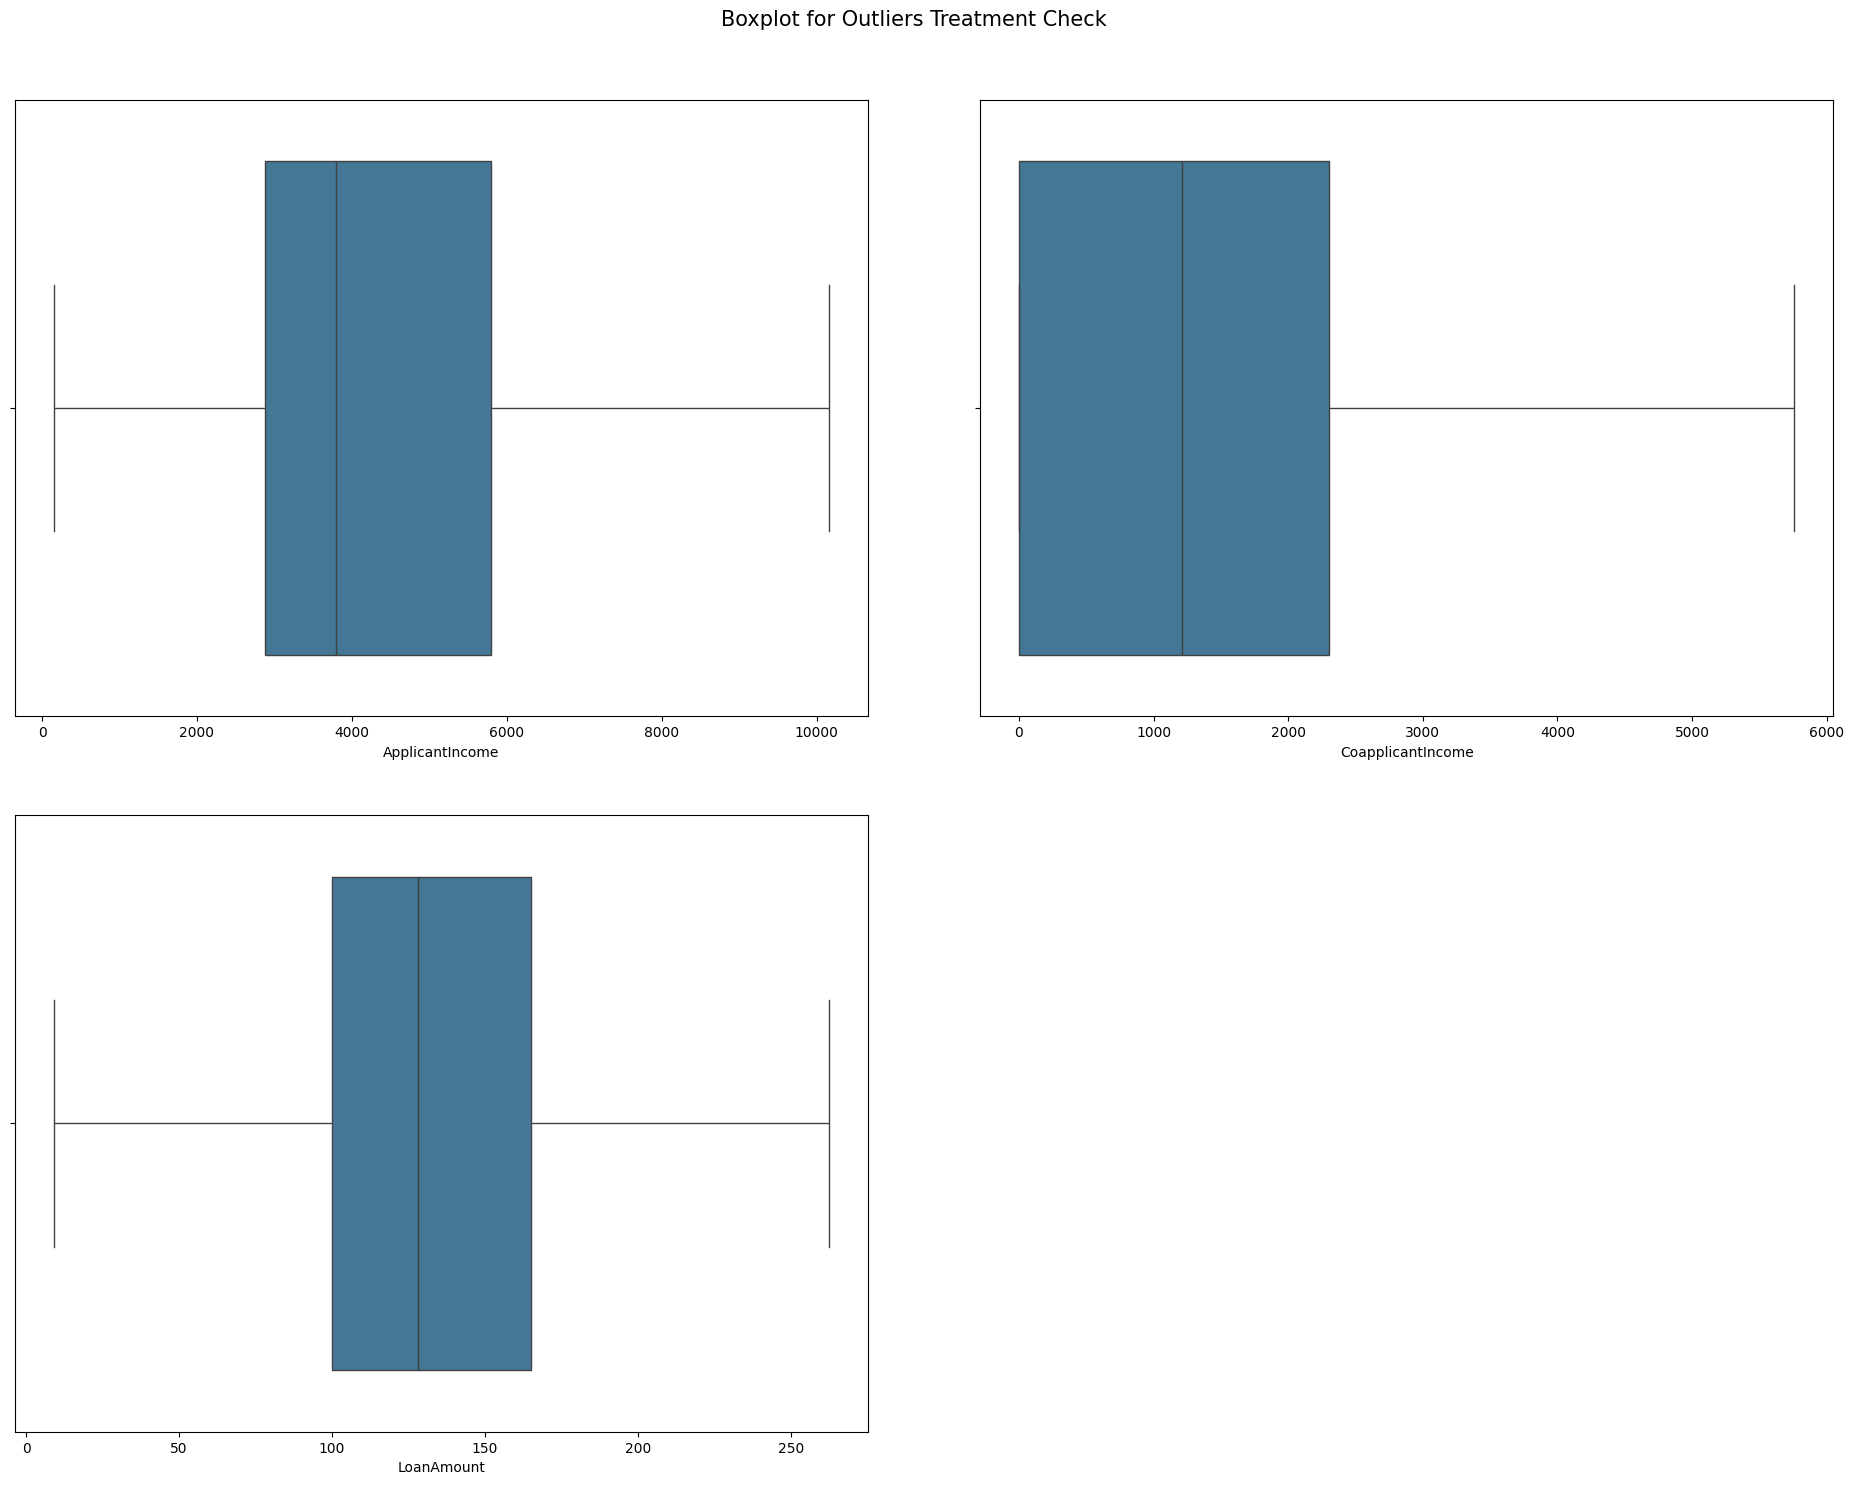

In [43]:
# set the number of rows and columns for the grid
rows, cols = 2, 2

# create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
fig.tight_layout(pad=5.0)
fig.suptitle('Boxplot for Outliers Treatment Check', fontsize=15, y=1.01)

# loop through each column and plot on a different subplot
for i, col in enumerate(ol_cols):
    row_pos = i // cols
    col_pos = i % cols
    sns.boxplot(data=df, x=col, ax=axes[row_pos, col_pos], palette="mako")


# remove any empty subplots
for j in range(i+1, rows*cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.show()

# **Feature Engineering**

## Feature Creation

In [44]:
# create total income features for more meaningful information
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [45]:
""" Measures the requested loan amount relative to the applicant's income (or total income).
This helps identify potentially risky applications where the loan is disproportionately large. """

df['IncomeLoanRatio'] = np.where(
    df['TotalIncome'] > 0,
    (df['LoanAmount'] * 1000) / df['TotalIncome'],
    np.where(df['ApplicantIncome'] > 0, (df['LoanAmount'] * 1000) / df['ApplicantIncome'], 0)
)

In [46]:
# convert Loan_Amount_Term from months to years for potentially easier interpretation.
df['LoanTearmYears'] = df['LoanAmountTerm'] / 12

In [47]:
# a binary flag indicating whether a co-applicant contributes financially
df['Has_CoApplicantIncome'] = np.where(df['CoapplicantIncome'] > 0, 1, 0)

## Categorical Encoding

In [48]:
# columns for One-Hot Encoding
ohe = ['Gender', 'Married', 'Education', 'PropertyArea']

# One-Hot Encoding for the categorical columns
df_encoded = pd.get_dummies(df, columns=ohe, drop_first=True)

In [49]:
# label encoding for target feature
le = LabelEncoder()
df_encoded['LoanStatus'] = le.fit_transform(df_encoded['LoanStatus'])

In [50]:
# check encoding
df_encoded.head()

,Dependents,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,LoanStatus,TotalIncome,IncomeLoanRatio,LoanTearmYears,Has_CoApplicantIncome,Gender_Male,Married_Yes,Education_Not Graduate,PropertyArea_Semiurban,PropertyArea_Urban
0,0.0,No,5849.0,0.0,146.369492,360.0,1.0,1,5849.0,25.024704,30.0,0,True,False,False,False,True
1,1.0,No,4583.0,1508.0,128.000000,360.0,1.0,0,6091.0,21.014612,30.0,1,True,True,False,False,False
2,0.0,Yes,3000.0,0.0,66.000000,360.0,1.0,1,3000.0,22.000000,30.0,0,True,True,False,False,True
3,0.0,No,2583.0,2358.0,120.000000,360.0,1.0,1,4941.0,24.286582,30.0,1,True,True,True,False,True
4,0.0,No,6000.0,0.0,141.000000,360.0,1.0,1,6000.0,23.500000,30.0,0,True,False,False,False,True


## Feature Dropping

In [53]:
# columns to drop
drop_cols = ['SelfEmployed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmountTerm']

# drop columns
df_encoded.drop(columns=drop_cols, inplace=True)